# Capstone Project
# Forecasting Future Price Using Technical Analysis, Price Action, and Supervised Machine Learning
Warren Buffet is one of, if not the, greatest investor of all time. Anyone who has purchased, withheld from, or attempted to day-trade a particular stock with the undeniable self-certainty of its' impending movement knows how devastatingly unforgiving and unpredictable market forces can be. Studies show that [more than 97% of day traders are unsuccessful and lose money over time](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3423101), with just 1.1% of traders earning more than minimum wage and only 0.5% of traders exceeding the salary of entry level job. Even highly intelligent fund managers equiped with a wealth of valuable data and resources struggle to keep up with the returns of the S&P 500. In fact, only [15% of funds in the IA North American sector were able to beat it over the last 10 years.](https://portfolio-adviser.com/the-15-of-us-funds-that-beat-the-sp-500-over-the-past-decade/) 

In light of the statistically large number of failed traders and underperformers, it lends even more credit to the exceptional success of Buffet's career. How is it that he able to consistantly and reliably outsmart the [unfathomable randomness of Brownian Motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion?utm_source=chatgpt.com) and predict the direction of his stocks with enough accuracy as to outperform the vast majority of the investment world year over year. If not for the comprehensive investment philosphy and thoroughly described research methods outlined in the letters he sends to shareholderes of Berkshire Hathaway every year, his ability to predict the future would almost seem supernatural. Barring undisclosed superpowers, we can safely assume Buffet has simply built his own highly effective price prediction model using a carefully selected basket of features encompassing historical price action, technical analysis, financial metrics, market sentiment, economic data, human psychology, and more. 

While we may not possess as much knowledge or experience as the worlds greatest investor, we can begin constructing a model to predict future price by experimenting with features utilized by accomplished long term investors, profitable traders in both intra-day and swing trading, and data-driven quantitative analysts. Technical Analysis (TA) indicators, which are lauded by day traders and can often be found integrated into the trading strategies of a variety investment professionals, are statistical tools used to analyze market trends, aid in decision making, and forecast probabilistic movements. Simple Moving Averages (SMA), Volume-Weighted Average Price (VWAP), and Relative Strength Index (RSI) are examples of commonly used TA indicators which are calculated using price or volume or both. These tools are 'lagging indicators', meaning they rely on historical data to generate signals and are reflective past price movements and trends, rather than predicting future price action. We use them to find levels of support and resistance, historically repeated patterns, and confirmation signals to enhance our other trades. 

In order to begin the process of building a system of algorithmic trading strategies using machine learning, we will calculcate commonly used TA indicators and use them to predict stock price 1 week (5 trading days) in the future. This will give us a great baseline to see how useful analyzing TA indicators are to future price prediction, and which TA indicators are most correlated with future price. 

## Data Understanding
The target of our predictive model is daily closing price('Close'), which will be pulled from the 'yfinance' python library, along with daily open price('Open'), daily high price ('Daily_High'), daily low price ('Daily_Low'), and daily volume ('Volume'). In order to give the model enough information to find patterns, we will use about 10 years of trading data from 2015-01-01 to 2025-03-05. 

Before pulling the data, we use a CSV file downloaded from nasdaq.com which contains a list of the top 5000 stocks by market cap. Because of the limited computational power we have, we will only be using the top 25 stocks by marketcap. Once we import that CSV file, we will filter out all stocks which aren't common shares and remove any ticker names that are not available on Yahoo Finance. Upon doing this, we can pull in the 10 years of data from Yahoo Finance using our top 25 stock tickers by market cap and organize them into a dataframe for data manipulation. 

Once we have our top 25 stocks in a dataframe, each containing 10 years of daily price data, we'll begin calculating our TA indicators using the daily closing price. Below is a list of the TA indicators we will be calculating and including in our model:
* Simple Moving Average (SMA)
  * An average of past prices over a set period of time, smoothing out price fluctuations.
* Exponential Moving Average (EMA)
  * A weighted moving average that gives more importance to recent prices for faster trend detection.
* Relative Strengh Index (RSI)
  * A momentum oscillator that measures the speed and change of price movements to identify overbought and oversold conditions. 
* Moving Average Convergence Divergence (MACD)
  * A trend-following indicator that tracks the relationship between two moving averages to signal potential buy/sell opportunities.
* Stochastic Oscillator
  * A momentum indicator comparing a securitiy's closing price to its' price range over a given period to gauge trend strength. 
* Volume-Weighted Average Price (VWAP)
  * A benchmark indicator that calculates the average price of a security based on both price and volume.
* Bollinger Bands
  * A volatility indicator that consists of a moving average with upper and lower bands expanding or contracting based on market volatility. 
* Average True Range (ATR)
  * A measure of market volatility that tracks the average range between high and low prices over a set period. 
* On-Balance Volume (OBV)
  * A volume-based momentum indicator that adds or subtracts volume based on price movements to assess buying and selling pressure.
* Fibonacci Levels
  * Key price levels derived from the Fibonacci sequence, used to identify potential support and resistance zones. 
* Momentum
  * A trend indicator that measures the speed of price movement to identify the strength of a trend.
* Quantiles
  * Statistical thresholds that divide the dataset into equal parts including the median, upper quantile, and lower quantile.
 
On top of this, moving averages will be calculated for all of these indicators and the daily price action that we pulled from yfinance (daily open price, daily high price, daily low price, and daily volume) with the exception of our target varaible (daily closing price). Each of these will get a 3day, 5day, and 7day moving average that will be used as an individual feature. In addition to the moving averages, the top 35 features most important to predicting the target variable will be getting 'lags', which basically give the model access to recent data. Since the model will only be looking at one row at a time, we need lags in order to give the model access to what the feature values were yesterday, the day before that, etc. The top 35 most important features will receive the following lags: 1, 2, 3, 4, and 5. Once these lags are calculated, we will then find the most important features and filter by the top 60. After this, we will complete our preprocessed data by including 1, 2, 3, 4, and 5-day lags for our target variable (daily closing price). We need to do this in order to give our model access to what the previous daily closing prices were in order to enhance our predictive capability. On top of this, we made sure to only include data that would be available to a person trading with the same information. 

## Data Preparation

In [ ]:
### Import Libraries
All python libraries used throughout the project will be imported here, in order to prevent redundancy and maintain cleaner, more organized code. This ensures are dependencies are loaded at the start, making it easier to manage imports and avoid potential issues with mising modules in different sections of the project. 

In [ ]:
# Import Libraries
import warnings # Warning Supression t
from pandas.errors import PerformanceWarning 
import numpy as np
import pandas as pd
import math
import yfinance as yf
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


### Warning Supression
In some cases, python libraries may generate warnings that do not effect the correctness of the code, but clutter the output. To maintain clean and readable code, we suppress these unnecessary warnings, while leaving actual critical warnings the ability to appear. 

In [720]:

# Warning Supression to ignore errors related to updating software
warnings.filterwarnings('ignore')

# Ignore PerformanceWarning to avoid inefficiency error 
warnings.filterwarnings('ignore', category=PerformanceWarning)

# Suppress warnings from yfinance
warnings.filterwarnings("ignore", category=UserWarning, module='yfinance')

# Suppress specific warnings from yfinance
warnings.filterwarnings("ignore", message=".*no price data found.*")


### Load Stock CSV file into DataFrame
Load the CSV file from nasdaq.com into a DataFrame, only keep the necessary columns 'Symbol', 'Name', and 'Market Cap', remove the '$' and ',' from the 'Market Cap' column so that we can sort it in descending order, filter to only import the top 100 stocks by market cap, and reset index for readability. 

In [721]:
# Load the CSV file into a DataFrame
csv_file_path = '/Users/evancallaghan/Downloads/nasdaq_screener_1726538993372.csv' 
df = pd.read_csv(csv_file_path)

# Filter DataFrame to only show the columns 'Symbol', 'Name', and 'Market Cap'
df = df[['Symbol', 'Name', 'Market Cap']]

# Convert 'Market Cap' to numeric if it's not already
# Remove commas, dollar signs, and replace these symbols with empty spaces
df['Market Cap'] = df['Market Cap'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Sort the DataFrame by Market Cap in descending order
df_sorted = df.sort_values(by='Market Cap', ascending=False).head(100)                                                                        

# Reset the index of the DataFrame and drop the old index
df_sorted.reset_index(drop=True, inplace=True)

# Update the index to start from 1 instead of 0
df_sorted.index = df_sorted.index + 1

# Display the first few rows of the updated DataFrame
df_sorted.head()


,Symbol,Name,Market Cap
1,AAPL,Apple Inc. Common Stock,3.288959e+12
2,MSFT,Microsoft Corporation Common Stock,3.206167e+12
3,NVDA,NVIDIA Corporation Common Stock,2.864613e+12
4,GOOG,Alphabet Inc. Class C Capital Stock,1.957167e+12
5,GOOGL,Alphabet Inc. Class A Common Stock,1.945719e+12


### Remove All Stocks Except Common Shares
For our model, we remove all stocks except common shares to ensure the dataset focuses solely on publicly traded equity. Other stock classifications, such as global notes and capital stock, may represent different ownership structures or financial instruments that do not align with the analysis of common stock performance. 

In [722]:
# Ensure there are no leading or trailing whitespaces in the 'Name' column
df_sorted['Name'] = df_sorted['Name'].str.strip()

# List of terms to filter out
terms_to_drop = ["Capital Stock", "Depository Shares", "Global Notes", "ADS", 
                 "Registry Shares", "Depositary Shares"
]

# Create a regex pattern to match any of the terms
# //b ensures that the match occues only at the start or end of a word
# pipe '|' ensures that if any of the terms in 'terms_to_drop' are seen, 
# there is a match
pattern = '|'.join([f"\\b{term}\\b" for term in terms_to_drop])

# Apply filtering based on the updated pattern
df_filtered = df_sorted[~df_sorted['Name'].str.contains(pattern, case=False, 
                                                        na=False)
]
# Reset the index of the DataFrame and drop the old index
df_filtered.reset_index(drop=True, inplace=True)

# Update the index to start from 1 instead of 0
df_filtered.index = df_filtered.index + 1

# Display the first few rows of the updated DataFrame
df_filtered.head()

,Symbol,Name,Market Cap
1,AAPL,Apple Inc. Common Stock,3.288959e+12
2,MSFT,Microsoft Corporation Common Stock,3.206167e+12
3,NVDA,NVIDIA Corporation Common Stock,2.864613e+12
4,GOOGL,Alphabet Inc. Class A Common Stock,1.945719e+12
5,AMZN,Amazon.com Inc. Common Stock,1.940525e+12


### Remove Invalid Tickers
Some stock tickers in the list from nasdaq.com may be not available on Yahoo Finance for a variety of reasons, so to avoid errors in the future, we will cross-examine the list of stocks from nasdaq.com with the stocks available on Yahoo Finance. If the stocks are not available on Yahoo Finance, they will will be removed from our DataFrame. 

In [723]:
# Remove stock tickers not found on yahoo finance
# Convert df_filtered['Symbol'] to a list
stock_list = df_filtered['Symbol'].head(50).astype(str).tolist()

# Function to check if a stock ticker is valid
def is_valid_ticker(ticker):
    try:
        stock = yf.Ticker(ticker)
        hist = stock.history(period="1d")  # Fetch 1 day of historical data
        return not hist.empty  # Valid if data is not empty
    except Exception as e:
        return False  # If there's an error, consider it invalid


# Filter out invalid tickers
valid_tickers = [ticker for ticker in stock_list if is_valid_ticker(ticker)]

# Keep only valid tickers in df_filtered
df_filtered = df_filtered[df_filtered['Symbol'].isin(valid_tickers)]

# Reset the index of the DataFrame and drop the old index
df_filtered.reset_index(drop=True, inplace=True)

print("All invalid tickers have been successfully removed.")


Failed to get ticker 'BRK/A' reason: Expecting value: line 1 column 1 (char 0)
$BRK/A: possibly delisted; no price data found  (period=1d)
Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)
$BRK/B: possibly delisted; no price data found  (period=1d)


All invalid tickers have been successfully removed.


### Download Historical Data from Yahoo Finance
Download historical price data of the top 25 stocks in our nasdaq.com list from 2015-01-01 to 2025-03-05. Get the daily close, daily open, daily high, daily low, and volume. Use 'auto_adjust=True' to make sure that the stock prices are adjusted for stock splits and dividends. 

In [380]:
# Import 10 years of daily historial price data from Yahoo Finance

# Convert df_filtered['Symbol'] to a list of top 25 stocks by marketcap
stock_list = df_filtered['Symbol'].head(25).astype(str).tolist() # changed from 25

# Download data for all stocks
data = yf.download(stock_list, start="2015-01-01", end="2025-03-05", auto_adjust=True, actions=False)[['Close', 'Open', 'High', 'Low', 'Volume']]

# Reshape the data: Convert tickers from columns to rows
daily_stock_price = data.stack().reset_index()

# Rename columns for clarity
daily_stock_price.columns = ['Date', 'Symbol', 'Close', 'Open', 'Daily_High', 'Daily_Low', 'Volume']

# Display the transformed DataFrame
daily_stock_price.head()


[*********************100%***********************]  25 of 25 completed


,Date,Symbol,Close,Open,Daily_High,Daily_Low,Volume
0,2015-01-02,AAPL,24.320435,24.778681,24.789804,23.879983,212818400
1,2015-01-02,ABBV,43.156200,42.861464,43.490238,42.861464,5086100
2,2015-01-02,AMZN,15.426000,15.629000,15.737500,15.348000,55664000
3,2015-01-02,AVGO,7.628657,7.692680,7.790239,7.555488,13500000
4,2015-01-02,BAC,14.532607,14.605676,14.638152,14.353995,48951100


### Re-order the DataFrame for proper Time Series Analysis
To make sure our data is set up chronologically correct for modeling and grouped by stock ticker, we need to sort our historical data by the stock ticker, then make sure to have the ticker repeat on every single line for the duration of it's price history. This way when training the data, the model will know that when the stock ticker changes, that means the date column will restart and a new modeling framework should take place. In addition to this, make sure that the 'Date' column is in datetime format, so that we can filter by date when modeling and testing. 

In [381]:
# Now group by 'Symbol' and reset the index for the entire dataframe
daily_stock_price = daily_stock_price.groupby('Symbol').apply(lambda x: x.reset_index(drop=True))

# Fill down the 'Symbol' column (so it repeats for each stock's data)
daily_stock_price['Symbol'] = daily_stock_price['Symbol'].fillna(method='ffill')

# Reset the index again and drop the existing 'Symbol' index
daily_stock_price = daily_stock_price.reset_index(drop=True)

# Make sure Date column is in datetime datatype format
daily_stock_price['Date'] = pd.to_datetime(daily_stock_price['Date'], errors='coerce')

# Display the first few rows
daily_stock_price.head()


,Date,Symbol,Close,Open,Daily_High,Daily_Low,Volume
0,2015-01-02,AAPL,24.320435,24.778681,24.789804,23.879983,212818400
1,2015-01-05,AAPL,23.635292,24.089090,24.169172,23.448435,257142000
2,2015-01-06,AAPL,23.637512,23.699798,23.897778,23.274918,263188400
3,2015-01-07,AAPL,23.968962,23.846614,24.069063,23.735389,160423600
4,2015-01-08,AAPL,24.889902,24.298187,24.947740,24.180287,237458000


### Initialize Window, Calculate TA indicators, and Create Moving Averages
Now we initialize a window for our moving average calculations, calculate all of our TA indicators using our daily price data, and create moving averages for daily price data as well as TA indicators. 

In [382]:
# Create a copy and rename it 
stock_data_1_week = daily_stock_price.copy()

# Define list of window sizes for calculating moving averages
one_week_window = [3, 5, 7]

In [383]:
# Create moving averages for Daily Volume, Daily High Price,
# Daily Low Price, and Daily Open Price
# Group by stock symbol and Apply a rolling window of all sizes in one_week_window
# For each daily stock metric in each stock symbol
# Shift by 1 day to prevent future data leakage

# Daily Volume MA
for col in stock_data_1_week.columns 
    for window in one_week_window: 
          
        stock_data_1_week[f'Volume_{window}day_avg'] = stock_data_1_week.groupby(
            #
            'Symbol')['Volume'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean().shift(1)
        )

# Daily High Price MA
for col in stock_data_1_week.columns: 
    for window in one_week_window: 
        
        stock_data_1_week[f'Daily_High_{window}day_avg'] = stock_data_1_week.groupby(
        
            'Symbol')['Daily_High'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean().shift(1)
        )   

# Daily Low Price MA
for col in stock_data_1_week.columns:
    for window in one_week_window:
        
        stock_data_1_week[f'Daily_Low_{window}day_avg'] = stock_data_1_week.groupby(
             # Apply a rolling mean to the Daily Low of each stock symbol.
            'Symbol')['Daily_Low'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean().shift(1)
        )   

# Daily Open Price MA
for col in stock_data_1_week.columns: 
    for window in one_week_window: 
        
        stock_data_1_week[f'Open_{window}day_avg'] = stock_data_1_week.groupby(
            
            'Symbol')['Open'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean().shift(1)
        )


In [384]:
# Exponential Moving Average (EMA)
# Calculate EMA for window sizes in one_week_window
# Apply an Exponential Weighted Moving Average to the 
# 'Close' price while grouping by 'Symbol' 
# Store result in a new column for each window size

for col in stock_data_1_week.columns:
    for window in one_week_window:
        stock_data_1_week[f'EMA_{window}'] = stock_data_1_week.groupby('Symbol')['Close'].transform(
            lambda x: x.shift(1).ewm(span=window, adjust=False).mean()
        )
       


In [385]:
# Simple Moving Average (SMA)
# Calculate SMA for window sizes in one_week_window
# Apply a rolling window to the 'Close' price while grouping by 'Symbol'. 
# Store result in a new column for each window

for col in stock_data_1_week.columns:
    for window in one_week_window:
        stock_data_1_week[f'SMA_{window}'] = stock_data_1_week.groupby('Symbol')['Close'].transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=1).mean()
        )


In [386]:
# RSI

# Define a function to calculate RSI
def calculate_rsi(stock_data_1_week, window):
    # Calculate price changes
    delta = stock_data_1_week['Close'].diff()

    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate the rolling average of gains and losses
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    # Calculate Relative Strength (RS)
    rs = avg_gain / avg_loss

    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))

    stock_data_1_week['RSI'] = rsi

    return rsi


# Most common RSI calcilation is using a 14day MA
# Add to DataFrame
stock_data_1_week['RSI'] = calculate_rsi(stock_data_1_week, 14).shift(1)

# Apply the calculate_rsi function to 'Close' price while grouping by 'Symbol'
# Store RSI value in new column for each window size
# Shift by 1 to prevent future leakage
for col in stock_data_1_week.columns:
    for window in one_week_window:
        stock_data_1_week[f'RSI_{window}'] = stock_data_1_week.groupby('Symbol', group_keys=False).apply(
        lambda x: calculate_rsi(x, window=window).shift(1)
        ).reset_index(drop=True)



In [387]:
# Create function to calculate the MACD (Moving Average Convergence Divergence) 
# Compute 12day and 26day Exponential Moving Averages(EMAs)
# Compute MACD line as difference between 12day and 26day EMA
# Compute the Signal Line as the 9day EMA of the MACD
# Drop unneeded 12day EMA and 26day EMA


def calculate_macd(df):
    
    df['EMA_12_MACD'] = df.groupby('Symbol')['Close'].transform(
        lambda x: x.ewm(span=12, adjust=False).mean()
    )
    df['EMA_26_MACD'] = df.groupby('Symbol')['Close'].transform(
        lambda x: x.ewm(span=26, adjust=False).mean()
    )

    df['MACD'] = df['EMA_12_MACD'] - df['EMA_26_MACD']
    df['Signal_Line'] = df.groupby('Symbol')['MACD'].transform(
        lambda x: x.ewm(span=9, adjust=False).mean()
    )
    df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']

    df.drop(columns = ['EMA_12_MACD', 'EMA_26_MACD'], inplace=True)

# Create funcion that calculates rolling averages of the MACD indicator for a 
# given window size 
# Apply a rolling mean to the MACD, Signal Line, and MACD Histogram
# Create a new column for each rolling window size
# Shift values by 1 to prevent future data leakage
  

def calculate_rolling_macd(df, window):
    # Apply rolling average to the MACD, Signal Line, and MACD Histogram with a shift to avoid future data leakage
    df[f'MACD_rolling_{window}'] = df.groupby('Symbol')['MACD'].transform(
        lambda x: x.shift(1).rolling(window=window, min_periods=1).mean()
    )
    
    df[f'Signal_rolling_{window}'] = df.groupby('Symbol')['Signal_Line'].transform(
        lambda x: x.shift(1).rolling(window=window, min_periods=1).mean()
    )
    
    df[f'MACD_Histogram_rolling_{window}'] = df.groupby('Symbol')['MACD_Histogram'].transform(
        lambda x: x.shift(1).rolling(window=window, min_periods=1).mean()
    )
    
  
# Compute MACD and Signal Line for each stock symbol
calculate_macd(stock_data_1_week)

# Apply calculate_rolling_macd() function to each window size in one_week_window
for col in stock_data_1_week.columns:
    for window in one_week_window:
        calculate_rolling_macd(stock_data_1_week, window)







In [388]:
stock_data_1_week.columns

Index(['Date', 'Symbol', 'Close', 'Open', 'Daily_High', 'Daily_Low', 'Volume',
       'Volume_3day_avg', 'Volume_5day_avg', 'Volume_7day_avg',
       'Daily_High_3day_avg', 'Daily_High_5day_avg', 'Daily_High_7day_avg',
       'Daily_Low_3day_avg', 'Daily_Low_5day_avg', 'Daily_Low_7day_avg',
       'Open_3day_avg', 'Open_5day_avg', 'Open_7day_avg', 'EMA_3', 'EMA_5',
       'EMA_7', 'SMA_3', 'SMA_5', 'SMA_7', 'RSI', 'RSI_3', 'RSI_5', 'RSI_7',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'MACD_rolling_3',
       'Signal_rolling_3', 'MACD_Histogram_rolling_3', 'MACD_rolling_5',
       'Signal_rolling_5', 'MACD_Histogram_rolling_5', 'MACD_rolling_7',
       'Signal_rolling_7', 'MACD_Histogram_rolling_7'],
      dtype='object')

In [389]:
# Create function to calculate Stochastic Oscillator
# Compute lowest low and highest over over a given window
# Compute %K as the relative position of the 'Close' price within the high range
# %D is the 3day moving average of %K
# Drop lowest low and highest high columns

def calculate_stoch_oscillator(df, windows):
        
    df['Stoch_Lowest_Low'] = df.groupby('Symbol')['Daily_Low'].transform(
        lambda x: x.rolling(window=window, min_periods=1).min()
    )
    
    df['Stoch_Highest_High'] = df.groupby('Symbol')['Daily_High'].transform(
        lambda x: x.rolling(window=window, min_periods=1).max()
    )
    
    df[f'%K_{window}'] = ((df['Close'] - df['Stoch_Lowest_Low']) / (df['Stoch_Highest_High'] - df['Stoch_Lowest_Low'])) * 100

    df[f'%D_{window}'] = df.groupby('Symbol')[f'%K_{window}'].transform(
            lambda x: x.rolling(window=3, min_periods=1).mean().shift(1)
    )

    df.drop(columns=['Stoch_Lowest_Low', 'Stoch_Highest_High'], inplace=True)

# Create function to calculate the 14day standard stochastic oscillator Indicator
# Use a window of 14 to get %K and %D is the 3day average of %K
    

def standard_stoch_oscillator(df):
    df['Stoch_Lowest_Low'] = df.groupby('Symbol')['Daily_Low'].transform(
        lambda x: x.rolling(window=14, min_periods=1).min()
    )
    
    df['Stoch_Highest_High'] = df.groupby('Symbol')['Daily_High'].transform(
        lambda x: x.rolling(window=14, min_periods=1).max()
    )
    
    df['%K'] = ((df['Close'] - df['Stoch_Lowest_Low']) / (df['Stoch_Highest_High'] - df['Stoch_Lowest_Low'])) * 100

    df['%D'] = df.groupby('Symbol')['%K'].transform(
            lambda x: x.rolling(window=3, min_periods=1).mean()
    )

    df.drop(columns=['Stoch_Lowest_Low', 'Stoch_Highest_High'], inplace=True)
  

# Compute standard 14day Stachastic Oscillator for each stock symbol
standard_stoch_oscillator(stock_data_1_week)

# Apply calculate_stoch_oscillator function to each window size
# in one week window and using stock_data_1_week DataFrame
for col in stock_data_1_week.columns:  
    for window in one_week_window:
        calculate_stoch_oscillator(stock_data_1_week, window)

    


In [390]:
# Create function to calculate Volume Weighted Average Price (VWAP) per stock symbol
# Calculate Cumulative Price Volume and Cumulative Volume
# Compute VWAP as the ratio of the cumulative price-volume to cumulative volume

# Calculate Volume Weighted Average Price (VWAP) per symbol
def calculate_vwap(df):
    # Ensure 'Close' and 'Volume' are numeric
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

    # Calculate cumulative price-volume product for VWAP
    df['Cumulative_Price_Volume'] = df.groupby('Symbol')['Close'].transform(
    lambda x: (x * df.loc[x.index, 'Volume']).cumsum()
    )
    # Calculate cumulative volume for VWAP
    df['Cumulative_Volume'] = df.groupby('Symbol')['Volume'].transform(
    lambda x: x.cumsum()
    )
    # Calculate VWAP as the ratio of cumulative sums for each group (symbol)
    df['VWAP'] = df['Cumulative_Price_Volume'] / df['Cumulative_Volume']



# Add VWAP and VWAP window averages to dataframe
# Shift rolling mean up by one to avoid future data leakage
    
calculate_vwap(stock_data_1_week)
for col in stock_data_1_week.columns:

    for window in one_week_window:

        stock_data_1_week[f'VWAP_{window}'] = stock_data_1_week.groupby('Symbol')['VWAP'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean().shift(1)
        )

        
# Drop intermediate columns for VWAP calculations
stock_data_1_week.drop(columns=['Cumulative_Price_Volume', 'Cumulative_Volume'], inplace=True)
    

In [391]:
stock_data_1_week.columns

Index(['Date', 'Symbol', 'Close', 'Open', 'Daily_High', 'Daily_Low', 'Volume',
       'Volume_3day_avg', 'Volume_5day_avg', 'Volume_7day_avg',
       'Daily_High_3day_avg', 'Daily_High_5day_avg', 'Daily_High_7day_avg',
       'Daily_Low_3day_avg', 'Daily_Low_5day_avg', 'Daily_Low_7day_avg',
       'Open_3day_avg', 'Open_5day_avg', 'Open_7day_avg', 'EMA_3', 'EMA_5',
       'EMA_7', 'SMA_3', 'SMA_5', 'SMA_7', 'RSI', 'RSI_3', 'RSI_5', 'RSI_7',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'MACD_rolling_3',
       'Signal_rolling_3', 'MACD_Histogram_rolling_3', 'MACD_rolling_5',
       'Signal_rolling_5', 'MACD_Histogram_rolling_5', 'MACD_rolling_7',
       'Signal_rolling_7', 'MACD_Histogram_rolling_7', '%K', '%D', '%K_3',
       '%D_3', '%K_5', '%D_5', '%K_7', '%D_7', 'VWAP', 'VWAP_3', 'VWAP_5',
       'VWAP_7'],
      dtype='object')

In [392]:
# Calculate Bollinger Bands per symbol
# Calculate rolling averages and standard deviation of 'Close' column
# Using Middle Band and Standard Deviation, compute upper and Lower Bollinger Bands


def calculate_bollinger_bands(df):
    # Ensure 'Close' is numeric
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

    df['Middle_Band'] = df.groupby('Symbol')['Close'].transform(
    lambda x: x.rolling(window=window, min_periods=1).mean().shift(1)
    )
    
    df['Std_Dev'] = df.groupby('Symbol')['Close'].transform(
    lambda x: x.rolling(window=window, min_periods=1).std().shift(1)
    )
    
    df['Upper_Band'] = df['Middle_Band'] + (df['Std_Dev'] * 2)
    df['Lower_Band'] = df['Middle_Band'] - (df['Std_Dev'] * 2)

# Create function to calculate bollinger bands for multiple window sizes
# Apply calculate_bollinger_bands function to each window size and add to column

def calculate_bollinger_band_windows(df, windows):
    # Ensure 'Close' is numeric
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

    for window in windows:
        df[f'Middle_Band_{window}'] = df.groupby('Symbol')['Close'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean().shift(1)
        )

        df[f'Std_Dev_{window}'] = df.groupby('Symbol')['Close'].transform(
            lambda x: x.rolling(window=window, min_periods=1).std().shift(1)
        )

        df[f'Upper_Band_{window}'] = df[f'Middle_Band_{window}'] + (df[f'Std_Dev_{window}'] * 2)
        df[f'Lower_Band_{window}'] = df[f'Middle_Band_{window}'] - (df[f'Std_Dev_{window}'] * 2)
   


# Add Bollinger Bands to all dataframes
# Apply calculate_bollinger_bands to stock_data_1_week DataFrame
calculate_bollinger_bands(stock_data_1_week)   

# Loop through all columns and calculate Bollinger Bands 
# for each window in one_week_window
for col in stock_data_1_week.columns:
    calculate_bollinger_band_windows(stock_data_1_week, one_week_window)
            


In [393]:
# Average True Range (ATR)

# Function to calculate True Range (TR)
def calculate_true_range(df):
    # Convert relevant columns to numeric (if not already numeric)
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    df['Daily_High'] = pd.to_numeric(df['Daily_High'], errors='coerce')
    df['Daily_Low'] = pd.to_numeric(df['Daily_Low'], errors='coerce')

    # Ensure previous close is calculated per stock symbol to prevent cross-stock contamination
    df['ATR_Prev_Close'] = df.groupby('Symbol')['Close'].shift(1)

    df['ATR_High_Low'] = df['Daily_High'] - df['Daily_Low']  # High - Low
    df['ATR_High_Close'] = (df['Daily_High'] - df['ATR_Prev_Close']).abs()  # High - Prev Close
    df['ATR_Low_Close'] = (df['Daily_Low'] - df['ATR_Prev_Close']).abs()  # Low - Prev Close

    # True Range is the max of the three
    df['ATR'] = df[['ATR_High_Low', 'ATR_High_Close', 'ATR_Low_Close']].max(axis=1)

    # Drop Intermediate columns
    df.drop(columns=['ATR_Prev_Close', 'ATR_High_Low', 'ATR_High_Close', 'ATR_Low_Close'], inplace=True)
    

# Apply calculate_true_range to the stock_data_1_week DataFrame
calculate_true_range(stock_data_1_week)

# Grouped by 'Symbol', Add ATR rolling mean for each window size 
# in one_week_window
for col in stock_data_1_week.columns:
    for window in one_week_window:
        stock_data_1_week[f'ATR_{window}'] = stock_data_1_week.groupby('Symbol')['ATR'].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean().shift(1)
        )

In [394]:
stock_data_1_week.columns

Index(['Date', 'Symbol', 'Close', 'Open', 'Daily_High', 'Daily_Low', 'Volume',
       'Volume_3day_avg', 'Volume_5day_avg', 'Volume_7day_avg',
       'Daily_High_3day_avg', 'Daily_High_5day_avg', 'Daily_High_7day_avg',
       'Daily_Low_3day_avg', 'Daily_Low_5day_avg', 'Daily_Low_7day_avg',
       'Open_3day_avg', 'Open_5day_avg', 'Open_7day_avg', 'EMA_3', 'EMA_5',
       'EMA_7', 'SMA_3', 'SMA_5', 'SMA_7', 'RSI', 'RSI_3', 'RSI_5', 'RSI_7',
       'MACD', 'Signal_Line', 'MACD_Histogram', 'MACD_rolling_3',
       'Signal_rolling_3', 'MACD_Histogram_rolling_3', 'MACD_rolling_5',
       'Signal_rolling_5', 'MACD_Histogram_rolling_5', 'MACD_rolling_7',
       'Signal_rolling_7', 'MACD_Histogram_rolling_7', '%K', '%D', '%K_3',
       '%D_3', '%K_5', '%D_5', '%K_7', '%D_7', 'VWAP', 'VWAP_3', 'VWAP_5',
       'VWAP_7', 'Middle_Band', 'Std_Dev', 'Upper_Band', 'Lower_Band',
       'Middle_Band_3', 'Std_Dev_3', 'Upper_Band_3', 'Lower_Band_3',
       'Middle_Band_5', 'Std_Dev_5', 'Upper_Band_5', 

In [395]:
# Create function to calculate Fibonacci levels for a given window
# Group by 'Symbol' and calculate rolling max and min for each window 
# Shift(1) to avoid future data leakage
# For each Fibonacci level in the provided 'levels' list, calculate the retracement level
# This is done by subtracting the Fibonacci level multiplied by the difference 
# between high and low from the high value
# Add columns for each Fib Level and subsequent rolling window sizes

def fib_retracement(df, windows, levels):
    for window in windows:

        df[f'Fib_{window}_High_Max'] = df.groupby('Symbol')['Daily_High'].transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=1).max()
        )
        df[f'Fib_{window}_Low_Min'] = df.groupby('Symbol')['Daily_Low'].transform(
            lambda x: x.shift(1).rolling(window=window, min_periods=1).min()
        )
    
        # Calculate Fibonacci retracement levels for each level
        for level in fib_levels:
            df[f'{window}_day_Fib_{level*100:.1f}%'] = df[f'Fib_{window}_High_Max'] - (
                level * (df[f'Fib_{window}_High_Max'] - df[f'Fib_{window}_Low_Min']))

        # Drop Intermediate Columns
        df.drop(columns = [f'Fib_{window}_High_Max', f'Fib_{window}_Low_Min'], inplace=True)
    



# Define Fibonacci levels
fib_levels = [0.236, 0.382, 0.500, 0.618, 0.786, 1.000, 1.618, 2.618, 4.236]

# Apply fib_retracement function using our df, window sizes, and fib levels defined above
fib_retracement(stock_data_1_week, one_week_window, fib_levels)


In [396]:
# Create function to calculate OBV (On-Balance Volume)
# OBV uses volume flow to predict changes in stock price
# Group by 'Symbol' calculate difference between current day's
# closing price and previous days closing price.
# If price increased since yesterday, OBV increases by Volume
# If price decreased, OBV decreases by Volume 
# cumsum() makes it cumulative over time to keep track
# Shift(1) to prevent future data leakage 

def calculate_obv(df):
    df['OBV'] = df.groupby('Symbol').apply(
        lambda group: (np.sign(group['Close'].diff()) * group['Volume']).cumsum()
    ).reset_index(level=0, drop=True)

    df['OBV'] = df['OBV'].shift(1)
    
    df['OBV'] = df['OBV'].fillna(0) 

    return df

# Create function to calculate rolling OBV for a dataframe with specified window sizes
# Fill NaN values in first few rows with 0
def calculate_rolling_obv(df, windows):
    df[f'OBV_{window}day_avg'] = df.groupby('Symbol')['OBV'].transform(
        lambda x: x.rolling(window=window).mean()
    )

    df[f'OBV_{window}day_avg'] = df[f'OBV_{window}day_avg'].fillna(0)
    

# Apply OBV calculation to stock_data_1_week dataframe
calculate_obv(stock_data_1_week)

# Apply calculate_rolling_obv using stock_data_1_week
# and window sizes in one_week_window and add columns
# to DataFrame
for col in stock_data_1_week.columns:
    for window in one_week_window:
        calculate_rolling_obv(stock_data_1_week, window)


In [397]:
stock_data_1_week.columns

Index(['Date', 'Symbol', 'Close', 'Open', 'Daily_High', 'Daily_Low', 'Volume',
       'Volume_3day_avg', 'Volume_5day_avg', 'Volume_7day_avg',
       ...
       '7_day_Fib_61.8%', '7_day_Fib_78.6%', '7_day_Fib_100.0%',
       '7_day_Fib_161.8%', '7_day_Fib_261.8%', '7_day_Fib_423.6%', 'OBV',
       'OBV_3day_avg', 'OBV_5day_avg', 'OBV_7day_avg'],
      dtype='object', length=104)

In [398]:
# Create Function to calculate Momentum Features
# Calcualte momentum for a DataFrame with specified rolling window sizes
# Group by 'Symbol'
# Momentum is calculated by subtracting the 'Close' price of 'window' days ago from
# the current 'Close' price
# x.shift(window) shifts the 'Close' column by 'window' periods
# Fill the intial NaN rows with 0

def calculate_momentum(df, windows):
    for window in windows:

        df[f'Momentum_{window}'] = df.groupby('Symbol')['Close'].transform(
            lambda x: x - x.shift(window)
        ).fillna(0)

# Use calculate_momentum function on stock_data_1_week for all window sizes in one_week_window
calculate_momentum(stock_data_1_week, one_week_window)



In [399]:

# Create function to calculate Quantile-Based Features
# and add as new columns to DataFrame
# Group by 'Symbol' for each calculatoin
# Calculate median, quantile(0.25), and quantile(0.75) and apply given 
# rolling window sizes to each quantile calculation for each window
# Fill initial NaN columns with 0

def calculate_quantiles(df, windows):

    for window in windows:
    
        df[f'Rolling_Median_{window}'] = df.groupby('Symbol')['Close'].transform(
            lambda x: x.shift(1).rolling(window=window).median()
        ).fillna(0)
    
        # Rolling 25th Quantile
        df[f'Rolling_Quantile_25_{window}'] = df.groupby('Symbol')['Close'].transform(
            lambda x: x.shift(1).rolling(window=window).quantile(0.25)
        ).fillna(0)
    
        # Rolling 75th Quantile
        df[f'Rolling_Quantile_75_{window}'] = df.groupby('Symbol')['Close'].transform(
            lambda x: x.shift(1).rolling(window=window).quantile(0.75)
        ).fillna(0)

# Apply calculate_quantiles function to stock_data_1_week using window sizes in one_week_window
calculate_quantiles(stock_data_1_week, one_week_window)


In [400]:
stock_data_1_week.shape

(63925, 116)

### Filter Important Features to Lag
With 10 years of historical data, 12 TA indicators, and 3 moving averages for all features, the number of features can add up fast and too many features will add unnecessary noise to our model. In order to filter our features down to a reasonable number, we use the baseline version of our model in order to get a list of the top 35 features. These top 35 features will have lags added to them. Each feature will day 1day, 2day, 3day, 4day, and 5day lags, which are different from moving averages because they are just the feature shifted back 1, 2, 3, 4, and 5 days, as a way to give the model recent data. Once we add lags to the top 35 features, we add the lagged features to our DataFrame and then run it through the same baseline model again to get feature importance. This time, we filter by top 60 and only keep the top 60 features. We then add lags for our target variable ('Close'), which leaves us with 60 filtered important features, 2 descriptive columns ('Date', and 'Symbol'), our target variable, and the lags for our target variable, which leaves us with 68 total columns in our DataFrame. This is the finalized preprocesssed DataFrame we will use to train and test our model with. 

In [401]:
# Using the baseline XGBoost model, print out top 35 contributing features

stock_data_important_feat = stock_data_1_week.copy()

# Sort values by 'Symbol' and 'Date' to maintain time order
stock_data_important_feat = stock_data_important_feat.sort_values(by=['Symbol', 'Date'])

# Train on all data before 2023-01-24, test all data after 2023-01-31
stock_data_train = stock_data_important_feat[stock_data_important_feat['Date'] <= '2023-01-24']
stock_data_test = stock_data_important_feat[stock_data_important_feat['Date'] > '2023-01-31']

# Shift 'Close' to predict 5 trading days ahead
stock_data_train['Close_Target'] = stock_data_train.groupby('Symbol')['Close'].shift(-5)
stock_data_test['Close_Target'] = stock_data_test.groupby('Symbol')['Close'].shift(-5)

# Drop rows where 'Close_Target' is NaN (caused by shifting)
stock_data_train = stock_data_train.dropna(subset=['Close_Target'])
stock_data_test = stock_data_test.dropna(subset=['Close_Target'])

# Replace infinite values with NaN
stock_data_train.replace([np.inf, -np.inf], np.nan, inplace=True)
stock_data_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median (or mean) of each numeric column
numeric_cols_train = stock_data_train.select_dtypes(include=[np.number]).columns
numeric_cols_test = stock_data_test.select_dtypes(include=[np.number]).columns

stock_data_train[numeric_cols_train] = stock_data_train[numeric_cols_train].fillna(stock_data_train[numeric_cols_train].median())
stock_data_test[numeric_cols_test] = stock_data_test[numeric_cols_test].fillna(stock_data_test[numeric_cols_test].median())

# Create X (features) and y (target) for training
X_train = stock_data_train.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_train = stock_data_train['Close_Target']

# Create X and y for testing
X_test = stock_data_test.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_test = stock_data_test['Close_Target']

# Initialize and train XGBoost model
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    alpha=0,
    reg_lambda=1,  # Fixed parameter name
    objective='reg:squarederror',
    missing=np.nan, # Ensure missing values are handled correctly
    random_state=42
)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions 
y_pred_ = model.predict(X_test)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)

# Sort by importance and select top 35
top_35_important_features = feature_importance.nlargest(35).index.tolist()
print("Top 35 Important Features:", top_35_important_features)


Top 35 Important Features: ['Daily_Low', 'Daily_High', '3_day_Fib_50.0%', '3_day_Fib_23.6%', 'EMA_3', '5_day_Fib_50.0%', '3_day_Fib_38.2%', '5_day_Fib_23.6%', '7_day_Fib_78.6%', '3_day_Fib_78.6%', '5_day_Fib_100.0%', 'Rolling_Quantile_75_5', 'EMA_7', 'Rolling_Quantile_25_3', 'Rolling_Median_7', 'Upper_Band', '7_day_Fib_23.6%', 'SMA_5', 'Rolling_Quantile_75_3', 'Upper_Band_5', 'EMA_5', 'Daily_High_7day_avg', 'Rolling_Quantile_25_5', '3_day_Fib_261.8%', '7_day_Fib_61.8%', 'Lower_Band_3', 'SMA_7', 'Daily_High_5day_avg', 'Rolling_Quantile_75_7', '7_day_Fib_161.8%', 'Rolling_Quantile_25_7', 'Open', 'Upper_Band_3', 'Rolling_Median_5', '5_day_Fib_61.8%']


In [402]:
# Initialize features_to_lag as the top 35 important contributing features
features_to_lag = top_35_important_features

# Creating lag features for each column
lags = [1, 2, 3, 4, 5]

# Create function to  create lag features for eachof the given features
# Loop through each feature in top_35_important_features
# Check if column exists, if it doesn't exist, create lagging column
# for each lagged feature. 
# Each feature in top_35_important_features gets 5 lags
# If column not found in DataFrame, skip

def calculate_lag(df, features, lags):
    # Apply lags to the dataframe
    for col in features:
        if col in df.columns:
            for lag in lags:
                if f'{col}_lag_{lag}' not in df.columns:
                    df[f'{col}_lag_{lag}'] = df[col].shift(lag)
            # else:
                # print(f"Column '{col}' not found in dataframe, skipping.")


# Apply calculate_lag function using stock_data_1_week, features_to_lag, 
# and all 5 lags for each feature
calculate_lag(stock_data_1_week, features_to_lag, lags)
    
stock_data_1_week.shape

(63925, 291)

In [403]:
# With the addition of our lag features, we use the XGBoost baseline model
# to sort by the top 60 most important features
stock_data_important_feat = stock_data_1_week.copy()

# Sort values by 'Symbol' and 'Date' to maintain time order
stock_data_important_feat = stock_data_important_feat.sort_values(by=['Symbol', 'Date'])

# Train on all data before 2023-01-24, test all data after 2023-01-31
stock_data_train = stock_data_important_feat[stock_data_important_feat['Date'] <= '2023-01-24']
stock_data_test = stock_data_important_feat[stock_data_important_feat['Date'] > '2023-01-31']

# Shift 'Close' to predict 5 trading days ahead
stock_data_train['Close_Target'] = stock_data_train.groupby('Symbol')['Close'].shift(-5)
stock_data_test['Close_Target'] = stock_data_test.groupby('Symbol')['Close'].shift(-5)

# Drop rows where 'Close_Target' is NaN (caused by shifting)
stock_data_train = stock_data_train.dropna(subset=['Close_Target'])
stock_data_test = stock_data_test.dropna(subset=['Close_Target'])

# Replace infinite values with NaN
stock_data_train.replace([np.inf, -np.inf], np.nan, inplace=True)
stock_data_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median (or mean) of each numeric column
numeric_cols_train = stock_data_train.select_dtypes(include=[np.number]).columns
numeric_cols_test = stock_data_test.select_dtypes(include=[np.number]).columns

stock_data_train[numeric_cols_train] = stock_data_train[numeric_cols_train].fillna(stock_data_train[numeric_cols_train].median())
stock_data_test[numeric_cols_test] = stock_data_test[numeric_cols_test].fillna(stock_data_test[numeric_cols_test].median())

# Create X (features) and y (target) for training
X_train = stock_data_train.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_train = stock_data_train['Close_Target']

# Create X and y for testing
X_test = stock_data_test.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_test = stock_data_test['Close_Target']

# Initialize and train XGBoost model
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    alpha=0,
    reg_lambda=1,  # Fixed parameter name
    objective='reg:squarederror',
    missing=np.nan, # Ensure missing values are handled correctly
    random_state=42
)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions 
y_pred_ = model.predict(X_test)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)

# Sort by importance and select top 60
top_60_important_features = feature_importance.nlargest(60).index.tolist()
print("Top 60 Important Features:", top_60_important_features)


Top 60 Important Features: ['Daily_Low', 'Daily_High', '3_day_Fib_61.8%', 'EMA_3_lag_5', 'Daily_Low_lag_5', '5_day_Fib_50.0%', '3_day_Fib_78.6%_lag_4', '3_day_Fib_50.0%_lag_5', '3_day_Fib_23.6%', 'Daily_Low_lag_2', 'Rolling_Quantile_75_5', 'Daily_Low_lag_4', 'SMA_5_lag_5', 'Upper_Band', 'Rolling_Quantile_25_3', '3_day_Fib_78.6%', '7_day_Fib_23.6%', '5_day_Fib_100.0%', '5_day_Fib_23.6%', 'Rolling_Median_5_lag_1', 'Rolling_Quantile_75_3', 'Rolling_Quantile_25_5', 'SMA_7', 'Daily_High_7day_avg', '5_day_Fib_100.0%_lag_4', 'Rolling_Quantile_25_7', 'Daily_High_5day_avg', 'Rolling_Quantile_75_7_lag_5', 'Rolling_Quantile_75_7', '5_day_Fib_61.8%', 'Daily_High_lag_1', 'SMA_7_lag_5', 'Rolling_Median_7', 'Daily_High_7day_avg_lag_1', 'EMA_7', '7_day_Fib_61.8%', '3_day_Fib_50.0%', 'Lower_Band_3', '7_day_Fib_161.8%', '7_day_Fib_23.6%_lag_5', '5_day_Fib_23.6%_lag_1', '7_day_Fib_23.6%_lag_3', '7_day_Fib_23.6%_lag_1', 'Rolling_Median_5', '3_day_Fib_261.8%', 'Open', 'Upper_Band_5', 'Daily_High_lag_2', '7

In [404]:
# Filter stock_data_1_week dataframe to only the top 60 important features,
# descriptive columns, and the target features. 
# All other columns are removed

descriptive_features = ['Symbol', 'Date']

target_feature = ['Close']

filtered_features = descriptive_features + target_feature + top_60_important_features

stock_data_1_week = stock_data_1_week[filtered_features]

In [405]:
stock_data_1_week.shape

(63925, 63)

In [406]:

features_to_lag = target_feature

# Creating lag features for each column
lags = [1, 2, 3, 4, 5]

def calculate_lag(df, features, lags):
    # Apply lags to the dataframe
    for col in features:
        if col in df.columns:
            for lag in lags:
                if f'{col}_lag_{lag}' not in df.columns:
                    df[f'{col}_lag_{lag}'] = df[col].shift(lag)
            # else:
                # print(f"Column '{col}' not found in dataframe, skipping.")


# Apply calculate_lag) function to dataframe, features_to_lag,
# which is now just the target varible, and our list of 5 lags
calculate_lag(stock_data_1_week, features_to_lag, lags)
    
stock_data_1_week.head()

,Symbol,Date,Close,Daily_Low,Daily_High,3_day_Fib_61.8%,EMA_3_lag_5,Daily_Low_lag_5,5_day_Fib_50.0%,3_day_Fib_78.6%_lag_4,...,Rolling_Quantile_75_3_lag_1,3_day_Fib_261.8%_lag_4,Open_3day_avg,7_day_Fib_161.8%_lag_4,7_day_Fib_100.0%,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5
0,AAPL,2015-01-02,24.320435,23.879983,24.789804,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,2015-01-05,23.635292,23.448435,24.169172,24.227535,NaN,NaN,24.334894,NaN,...,0.000000,NaN,24.778681,NaN,23.879983,24.320435,NaN,NaN,NaN,NaN
2,AAPL,2015-01-06,23.637512,23.274918,23.897778,23.960838,NaN,NaN,24.119119,NaN,...,0.000000,NaN,24.433885,NaN,23.448435,23.635292,24.320435,NaN,NaN,NaN
3,AAPL,2015-01-07,23.968962,23.735389,24.069063,23.853604,NaN,NaN,24.032361,NaN,...,0.000000,NaN,24.189189,NaN,23.274918,23.637512,23.635292,24.320435,NaN,NaN
4,AAPL,2015-01-08,24.889902,24.180287,24.947740,23.616523,NaN,NaN,24.032361,NaN,...,23.978973,NaN,23.878500,NaN,23.274918,23.968962,23.637512,23.635292,24.320435,NaN


In [407]:
stock_data_1_week.shape

(63925, 68)

## Modeling
The model we will be using XGBoost (Extreme Gradient Boosting). XGBoost is a powerful machine learning algorithm based on gradient boosting and is optimized for speed and performance. It's great for structured data because of it's ability to handle missing values, prevent overfitting through regularlization, process large datasets, and handle unscaled data. XGBoost is used often in time series stock analysis for its' ability to capture complex patterns and identify nonlinear dependencies and interactions between features. This is especially useful since stock prices are influenced by a large number of factors. 
Below are some scientific and academic research papers on the usefulness of XGBoost for capturing complex patterns in time series data:
* [High High Accuracy Stock Trend Prediction using XGBoost Model by Alex Chen](https://osf.io/hmj53/?utm_source=chatgpt.com)
* [Stock Price Prediction Method Basedon XGboost Algorithm by Yifan Zhang](https://www.researchgate.net/publication/366442499_Stock_Price_Prediction_Method_Based_on_XGboost_Algorithm)
* [Stock Market Prediction: XGBoost and LSTM Comparative Analysis by Saddam Hossain and Gagninder Kaur](https://ieeexplore.ieee.org/document/10574794?utm_source=chatgpt.com)
* [Forecasting method of stock market volatility in time series data based on mixed model of ARIMA and XGBoost by Yan Wang and Yuankai Guo](https://ieeexplore.ieee.org/abstract/document/9058617)
* [Stock Market Performance Analytics Using XGBoost by Nisar Hussain, Amna Qasim, Zia-ud-din Akhtar, Ayesha Qasim, Gull Mehak, Luciana del Socorro Espindola Ulibarri, Olga Kolesnikova and Alexander Gelbukh ](https://link.springer.com/chapter/10.1007/978-3-031-47765-2_1)

Our XGBoost model is structured specifically for time series analysis. Instead of using the normal 'train_test_split', we manually split our data into training and testing sets, as 'train_test_split' would have randomly split data off for training and that would not work for temporal data. Our training data is all data for each stock from 2015-01-01 up to 2023-01-24 and all testing data is about the last two years of our data, from 2023-01-31 to the end of our data (2025-03-05). A copy of our target , 'Close', is copied and shifted back 5 trading days, so that the model can train on the value it is trying to predict with the feature values 5 trading days before. A default set of hyperparameters is used to create the model and upon fitting the model, performance metrics and a list of the top most important features are then printed out for evaluation. 

In total, 6 models are created and 3 hyperparameters are tuned. With the tuning of each hyperparameter, the metrics of the orignal model and tuned model will be evaluated based on metric performance. Evaluation of the best model will be based on:
* Performance metrics
  * R-Squared
    * Represents the proportion of variance in the dependent (target) variable that is explained by the model. It is on a scale of 0-1 and the closer the value is to 1, the better performing the model is. 
  * Mean Squared Error
    * Measures the average squared differences between the predicted and actual values. Larger values mean higher prediction errors. Sensitive to large values and can show if the model has high outliers. The lower the value, the better. 
  *  Mean Absolute Error
     * Calculates the average of the absolute differences between predicted and actual values. Useful because it is in the same units as our model, giving us a realistic typical error size that our model is off by. The lower the value, the better.
  *  Root Mean Squared Error
     * Like Mean Absolute Error, Root Mean Squared Error is useful for evaluation because the value is in the same units as our predicted values. It differs because it is the square root of the average of the squared differences in predicted and actual values, which penalizes larger errors more heavily than smaller errors. This metric is sensitive to large values and can show if outliers are distorting the model. The lower the value, the better.
  *  Mean Absolute Percentage Error (MAPE)
     * Measures the absolute percentage difference between predicted and actual values. The value is given in percentage terms. The lower the value, the better. 
* Feature Diversity
  * Making sure one feature is not responsible for explaining the majority of the model's predictive power.

### Model 1: Baseline Model

In [725]:
# Model 1: Baseline Model

# Sort values by 'Symbol' and 'Date' to maintain time order
stock_data_1_week = stock_data_1_week.sort_values(by=['Symbol', 'Date'])

# Use data until January 24 2023 for training 
stock_data_train_1_week_baseline = stock_data_1_week[stock_data_1_week['Date'] <= '2023-01-24']

# Use data from January 31 2023 onwards for testing
stock_data_test_1_week_baseline = stock_data_1_week[stock_data_1_week['Date'] > '2023-01-31']

# # Check if the test set is empty
# if stock_data_test_1_week_baseline.empty:
#     raise ValueError("No data available in the testing set for the given date range.")

# Shift 'Close' to predict 5 trading days ahead
stock_data_train_1_week_baseline['Close_Target'] = stock_data_train_1_week_baseline.groupby('Symbol')['Close'].shift(-5)
stock_data_test_1_week_baseline['Close_Target'] = stock_data_test_1_week_baseline.groupby('Symbol')['Close'].shift(-5)

# Drop rows where 'Close_Target' is NaN (caused by shifting)
stock_data_train_1_week_baseline = stock_data_train_1_week_baseline.dropna(subset=['Close_Target'])
stock_data_test_1_week_baseline = stock_data_test_1_week_baseline.dropna(subset=['Close_Target'])

# Replace infinite values with NaN
stock_data_train_1_week_baseline.replace([np.inf, -np.inf], np.nan, inplace=True)
stock_data_test_1_week_baseline.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median (or mean) of each numeric column
numeric_cols_train = stock_data_train_1_week_baseline.select_dtypes(include=[np.number]).columns
numeric_cols_test = stock_data_test_1_week_baseline.select_dtypes(include=[np.number]).columns

stock_data_train_1_week_baseline[numeric_cols_train] = stock_data_train_1_week_baseline[numeric_cols_train].fillna(stock_data_train_1_week_baseline[numeric_cols_train].median())
stock_data_test_1_week_baseline[numeric_cols_test] = stock_data_test_1_week_baseline[numeric_cols_test].fillna(stock_data_test_1_week_baseline[numeric_cols_test].median())

# # Check for the shapes of the data
# print(f"Training data shape: {stock_data_train_1_week_baseline.shape}")
# print(f"Testing data shape: {stock_data_test_1_week_baseline.shape}")

# Create X (features) and y (target) for training
X_train_1_week_baseline = stock_data_train_1_week_baseline.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_train_1_week_baseline = stock_data_train_1_week_baseline['Close_Target']

# Create X and y for testing
X_test_1_week_baseline = stock_data_test_1_week_baseline.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_test_1_week_baseline = stock_data_test_1_week_baseline['Close_Target']

# # Check the shapes of the training and testing data
# print(f"X_train_1_week_baseline shape: {X_train_1_week_baseline.shape}, y_train_1_week_baseline shape: {y_train_1_week_baseline.shape}")
# print(f"X_test_1_week_baseline shape: {X_test_1_week_baseline.shape}, y_test_1_week_baseline shape: {y_test_1_week_baseline.shape}")

# # Ensure there are samples in both training and testing sets
# if X_train_1_week_baseline.shape[0] == 0 or X_test_1_week_baseline.shape[0] == 0:
#     raise ValueError("Insufficient data in either training or testing set.")

# Initialize and train XGBoost model
model_baseline_1_week = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    alpha=0,
    reg_lambda=1,  # Fixed parameter name
    objective='reg:squarederror',
    missing=np.nan,  # Ensure missing values are handled correctly
    colsample_bytree = 1,
    random_state=42
)

# Train the model on the training data
model_baseline_1_week.fit(X_train_1_week_baseline, y_train_1_week_baseline)

# Make predictions on the test data
y_pred_1_week_baseline = model_baseline_1_week.predict(X_test_1_week_baseline)

# Print upon completion of training
print("Training for Model 1: Baseline Model complete.")

# # Calculate performance on the test data
# mse_test_1_week_baseline = mean_squared_error(y_test_1_week_baseline, y_pred_1_week_baseline)
# print(f'Mean Squared Error on unseen data (post-January 31, 2023): {mse_test_1_week_baseline}')


Training for Model 1: Baseline Model complete.


In [726]:
# Calculate performance metrics on test data

# Mean Absolute Error = average absolute difference between actual values and predicted values
# Mean Squared Error = average squared difference between actual values and predicted values
# Root Mean Squared Error = Square root of Mean Squared Error
# R_Squared = Measures how well model explains variance in the target variable
# Median Absolute Error = Median of Absolute differences between actual avlues and predicted values
# Mean Absolute Percentage Error (MAPE) = Expresses Percentage error as a percentage of actual values
# Durbin-Watson (DW) = Detects autocorrelation in residuals

mae_1_week_baseline = mean_absolute_error(y_test_1_week_baseline, y_pred_1_week_baseline)
mse_1_week_baseline = mean_squared_error(y_test_1_week_baseline, y_pred_1_week_baseline)
rmse_1_week_baseline = np.sqrt(mse_1_week_baseline)  # Root Mean Squared Error
r2_1_week_baseline = r2_score(y_test_1_week_baseline, y_pred_1_week_baseline)
medae_1_week_baseline = median_absolute_error(y_test_1_week_baseline, y_pred_1_week_baseline)
mape_1_week_baseline = np.mean(np.abs((y_test_1_week_baseline - y_pred_1_week_baseline) / y_test_1_week_baseline)) * 100
dw_stat_1_week_baseline = durbin_watson(y_test_1_week_baseline - y_pred_1_week_baseline)

# Print out the metrics for test data
print(f'Mean Absolute Error on test data: {mae_1_week_baseline}')
print(f'Mean Squared Error on test data: {mse_1_week_baseline}')
print(f'Root Mean Squared Error on test data: {rmse_1_week_baseline}')
print(f'R-squared on test data: {r2_1_week_baseline}')
print(f'Median Absolute Error on test data: {medae_1_week_baseline}')
print(f'MAPE on test data: {mape_1_week_baseline:.2f}%')
print(f'Durbin-Watson Statistic on test data: {dw_stat_1_week_baseline}')


# Get feature importance as a dictionary
feature_importance_1_week_baseline = dict(zip(X_train_1_week_baseline.columns, model_baseline_1_week.feature_importances_))

# Sort features by importance in descending order
sorted_features_1_week_baseline = sorted(feature_importance_1_week_baseline.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance values
for feature, importance in sorted_features_1_week_baseline:
    if int(importance*100) >= 1:
        print(f"{feature}: {importance * 100:.2f}%")



Mean Absolute Error on test data: 21.562943589494036
Mean Squared Error on test data: 4878.630902752068
Root Mean Squared Error on test data: 69.8471968138455
R-squared on test data: 0.86957195840017
Median Absolute Error on test data: 4.026458740234375
MAPE on test data: 4.86%
Durbin-Watson Statistic on test data: 0.016646394140688418
Daily_Low: 53.74%
Daily_High: 22.92%
5_day_Fib_50.0%: 4.23%
3_day_Fib_50.0%: 3.97%
Daily_Low_lag_5: 1.50%
7_day_Fib_23.6%: 1.17%
Upper_Band: 1.04%


### Model Evaluation: Model 1 Baseline Model
Baseline Model Performance Metrics on Test Set
* R-Squared: 0.8696
  * 86.96% of the variance in the target variance (daily closing price) is captured by the model, which is a strong fit.

* MAPE: 4.86%
  * On average, the model's predictions are off by 4.86% from the actual stock price.

* Root Mean Squared Error: 69.85
  * When giving extra weight to large errors, the model's predictions deviate from actual values by about $69.85 on average

* Mean Squared Error: 4878.63
  * A mean squared error of 4878.63 shows that our model has some large outliers.

* Mean Absolute Error: 21.56
  * On average, when giving equal weight to all errors, our model's predicted values deviate from the actual values by about $21.56
 
Feature Diversity
* Daily_Low and Daily_High contribute 53.75% and 22.92% respectfully to the model's predictions

For the model metrics, comparison evaluations cannot be performed until we create another model and compare the results. However, the lack of feature diversity in the current model should be addressed first. With only two features contributing the vast majority of the model's predictions (55% and 22%, respectively), it’s important to ensure that the model isn’t overly reliant on just a few features. To increase feature diversity, I decided to adjust the 'colsample_bytree' hyperparameter from 1 to 0.5. 'colsample_bytree' controls the fraction of features to be randomly sampled for each tree during the model's training process. By changing 'colsample_bytree' from 1 to 0.5, a random subset of features  (50% each subset) will be sampled for each tree during the model's training process. This should increase feature diversity and improve generalization, while maintaining relativley similar performance metrics. 



### Model 2: colsample_bytree = 0.5

In [727]:
# Model 2: colsample_bytree = 0.5
# attempt to reduce feature dominance, increase feature diversity, and prevent overfitting

# Sort values by 'Symbol' and 'Date' to maintain time order
stock_data_1_week = stock_data_1_week.sort_values(by=['Symbol', 'Date'])

# Use data until January 24 2023 for training
stock_data_train_1_week_bytree = stock_data_1_week[stock_data_1_week['Date'] <= '2023-01-24']

# Use data from January 31 2023 onwards for testing
stock_data_test_1_week_bytree = stock_data_1_week[stock_data_1_week['Date'] > '2023-01-31']

# # Check if the test set is empty
# if stock_data_test_1_week_bytree.empty:
#     raise ValueError("No data available in the testing set for the given date range.")

# Shift 'Close' to predict 5 trading days ahead
stock_data_train_1_week_bytree['Close_Target'] = stock_data_train_1_week_bytree.groupby('Symbol')['Close'].shift(-5)
stock_data_test_1_week_bytree['Close_Target'] = stock_data_test_1_week_bytree.groupby('Symbol')['Close'].shift(-5)

# Drop rows where 'Close_Target' is NaN (caused by shifting)
stock_data_train_1_week_bytree = stock_data_train_1_week_bytree.dropna(subset=['Close_Target'])
stock_data_test_1_week_bytree = stock_data_test_1_week_bytree.dropna(subset=['Close_Target'])

# Replace infinite values with NaN
stock_data_train_1_week_bytree.replace([np.inf, -np.inf], np.nan, inplace=True)
stock_data_test_1_week_bytree.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median (or mean) of each numeric column
numeric_cols_train = stock_data_train_1_week_bytree.select_dtypes(include=[np.number]).columns
numeric_cols_test = stock_data_test_1_week_bytree.select_dtypes(include=[np.number]).columns

stock_data_train_1_week_bytree[numeric_cols_train] = stock_data_train_1_week_bytree[numeric_cols_train].fillna(stock_data_train_1_week_bytree[numeric_cols_train].median())
stock_data_test_1_week_bytree[numeric_cols_test] = stock_data_test_1_week_bytree[numeric_cols_test].fillna(stock_data_test_1_week_bytree[numeric_cols_test].median())

# # Check for the shapes of the data
# print(f"Training data shape: {stock_data_train_1_week_bytree.shape}")
# print(f"Testing data shape: {stock_data_test_1_week_bytree.shape}")


# Create X (features) and y (target) for training
X_train_1_week_bytree = stock_data_train_1_week_bytree.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_train_1_week_bytree = stock_data_train_1_week_bytree['Close_Target']

# Create X and y for testing
X_test_1_week_bytree = stock_data_test_1_week_bytree.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_test_1_week_bytree = stock_data_test_1_week_bytree['Close_Target']

# # Check the shapes of the training and testing data
# print(f"X_train_1_week_bytree shape: {X_train_1_week_bytree.shape}, y_train_1_week_bytree shape: {y_train_1_week_bytree.shape}")
# print(f"X_test_1_week_bytree shape: {X_test_1_week_bytree.shape}, y_test_1_week_bytree shape: {y_test_1_week_bytree.shape}")

# # Ensure there are samples in both training and testing sets
# if X_train_1_week_bytree.shape[0] == 0 or X_test_1_week_bytree.shape[0] == 0:
#     raise ValueError("Insufficient data in either training or testing set.")

# Initialize and train XGBoost model
model_1_week_bytree = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    alpha=0,
    reg_lambda=1,  # Fixed parameter name
    objective='reg:squarederror',
    missing=np.nan,  # Ensure missing values are handled correctly
    colsample_bytree = 0.5,
    random_state=42
)

# Train the model on the training data
model_1_week_bytree.fit(X_train_1_week_bytree, y_train_1_week_bytree)

# Make predictions on the test data
y_pred_1_week_bytree = model_1_week_bytree.predict(X_test_1_week_bytree)

# Print upon completion of training
print("Training for Model 2 is complete.")

# # Calculate performance on the test data
# mse_test_1_week_bytree = mean_squared_error(y_test_1_week_bytree, y_pred_1_week_bytree)
# print(f'Mean Squared Error on unseen data (post-February 17, 2024): {mse_test_1_week_bytree}')


Training for Model 1: Baseline Model complete.


In [728]:
# Calculate performance metrics on test data

# Mean Absolute Error = average absolute difference between actual values and predicted values
# Mean Squared Error = average squared difference between actual values and predicted values
# Root Mean Squared Error = Square root of Mean Squared Error
# R_Squared = Measures how well model explains variance in the target variable
# Median Absolute Error = Median of Absolute differences between actual avlues and predicted values
# Mean Absolute Percentage Error (MAPE) = Expresses Percentage error as a percentage of actual values
# Durbin-Watson (DW) = Detects autocorrelation in residuals

mse_1_week_bytree = mean_squared_error(y_test_1_week_bytree, y_pred_1_week_bytree)
mae_1_week_bytree = mean_absolute_error(y_test_1_week_bytree, y_pred_1_week_bytree)
rmse_1_week_bytree = np.sqrt(mse_1_week_bytree)  # Root Mean Squared Error
r2_1_week_bytree = r2_score(y_test_1_week_bytree, y_pred_1_week_bytree)
medae_1_week_bytree = median_absolute_error(y_test_1_week_bytree, y_pred_1_week_bytree)
mape_1_week_bytree = np.mean(np.abs((y_test_1_week_bytree - y_pred_1_week_bytree) / y_test_1_week_bytree)) * 100
dw_stat_1_week_bytree = durbin_watson(y_test_1_week_bytree - y_pred_1_week_bytree)

# Print out the metrics for test data
print(f'Mean Squared Error on test data: {mse_1_week_bytree}')
print(f'Mean Absolute Error on test data: {mae_1_week_bytree}')
print(f'Root Mean Squared Error on test data: {rmse_1_week_bytree}')
print(f'R-squared on test data: {r2_1_week_bytree}')
print(f'Median Absolute Error on test data: {medae_1_week_bytree}')
print(f'MAPE on test data: {mape_1_week_bytree:.2f}%')
print(f'Durbin-Watson Statistic on test data: {dw_stat_1_week_bytree}')

# Get feature importance as a dictionary
feature_importance_1_week_bytree = dict(zip(X_train_1_week_bytree.columns, model_1_week_bytree.feature_importances_))

# Sort features by importance in descending order
sorted_features_1_week_bytree = sorted(feature_importance_1_week_bytree.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance values
for feature, importance in sorted_features_1_week_bytree:
    if int(importance*100) >= 1:
        print(f"{feature}: {importance * 100:.2f}%")



Mean Squared Error on unseen data: 4878.233916205177
Mean Absolute Error on unseen data: 21.514725427369815
Root Mean Squared Error on unseen data: 69.84435493441956
R-squared on unseen data: 0.8695825716600958
Median Absolute Error on unseen data: 3.9833831787109375
MAPE on unseen data: 4.84%
Durbin-Watson Statistic on unseen data: 0.016045219202062217
Daily_Low: 32.95%
Daily_High: 29.79%
3_day_Fib_61.8%: 10.72%
Open: 7.62%
3_day_Fib_23.6%: 3.41%
Rolling_Quantile_25_3: 3.23%
3_day_Fib_78.6%: 2.10%
5_day_Fib_50.0%: 1.21%


### Model Evaluation: Baseline Model vs. Model 2


| Performance Metric|Model 1|Model 2| Top Performing Model
|-|-|-|-|
| R-Squared| 0.86957 | 0.86956| Model 1
| Mape| 4.86% | 4.84% | Model 2
| Root Mean Squared Error| 69.847 | 69.852| Model 1
| Mean Squared Error| 4878.634 | 4879.256 | Model 1
| Mean Abolute Error| 21.563 | 21.521| Model 2
| Median Absolute Error | 4.026 | 3.983 | Model 2



|Feature|Model 1 Feature Diversity|
|-|-|
|Daily_Low|53.75%|
|Daily_High|22.92%|
|5_day_Fib_50.0%|4.23%|
|3_day_Fib_50.0%|3.97%|


|Feature|Model 2 Feature Diversity|
|-|-|
|Daily_Low|33.13%|
|Daily_High|28.05%|
|Open|13.37%|
|3_day_Fib_78.6%|6.89%|
|Rolling_Quantile_25_3|3.21%|

Let's first compare our feature diversity, which was the goal is changing colsample_bytree from 1 to 0.5 in model 2. As we can see, we were successful in increasing feature performance. Daily_Low dropped from 53.75% to 33.13%, and we now have two extra features over 5%. Before we solidify this as a success, let's compare our performance metrics. The most important metrics to us in this scenario are aboslute metrics. We are more concerned with how close the model's predictions are to the true value, regardless of a few large prediction errors, rather than working to minimize large prediction errors. Although squared metrics can be useful in some cases, absolute metrics are more interpretable, treat all errors equally, and give us an accurate representation of how far our predictions are off on average. Model 2 performed best with all of our absolute metrics: MAPE, Mean Absolute Value, and Median Absolute Value. For the squared metrics, model 1 technically had better values, but most of them were insignificant. Since model 2 positivley increased feature diversity and absolute performance metrics improved, model 2 is a better performer and we are going to solidfy the hyperparameter 'colsample_bytree' as 0.5 moving forward. 

The next hyperparameter we are going to adjust is 'max_depth', which controls the maximum depth of a decision tree. It helps determine how many levels a tree can grow before stopping. A larger 'max_depth' allows the tree to keep splitting until it fully classifies the data, potentially leading to overfitting. A smaller 'max_depth' limits how many splits can be made, forcing the tree to generalize more, but could lead to underfitting the data. Our default 'max_depth' is 5 and we are going to try 'max_depth' values of 3 and 7. 

### Model 3: max_depth = 3

In [412]:
# Model 3: max_depth = 3
# colsample_bytree = 0.5

# Sort values by 'Symbol' and 'Date' to maintain time order
stock_data_1_week = stock_data_1_week.sort_values(by=['Symbol', 'Date'])

# Use data until January 24 2023 for training
stock_data_train_1_week_md_3 = stock_data_1_week [stock_data_1_week ['Date'] <= '2023-01-24']

# Use data from January 31 2023 for testing
stock_data_test_1_week_md_3 = stock_data_1_week [stock_data_1_week ['Date'] > '2023-01-31']

# # Check if the test set is empty
# if stock_data_test_1_week_md_3.empty:
#     raise ValueError("No data available in the testing set for the given date range.")

# Shift 'Close' to predict 5 trading days ahead
stock_data_train_1_week_md_3['Close_Target'] = stock_data_train_1_week_md_3.groupby('Symbol')['Close'].shift(-5)
stock_data_test_1_week_md_3['Close_Target'] = stock_data_test_1_week_md_3.groupby('Symbol')['Close'].shift(-5)

# Drop rows where 'Close_Target' is NaN (caused by shifting)
stock_data_train_1_week_md_3 = stock_data_train_1_week_md_3.dropna(subset=['Close_Target'])
stock_data_test_1_week_md_3 = stock_data_test_1_week_md_3.dropna(subset=['Close_Target'])

# Replace infinite values with NaN
stock_data_train_1_week_md_3.replace([np.inf, -np.inf], np.nan, inplace=True)
stock_data_test_1_week_md_3.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median (or mean) of each numeric column
numeric_cols_train = stock_data_train_1_week_md_3.select_dtypes(include=[np.number]).columns
numeric_cols_test = stock_data_test_1_week_md_3.select_dtypes(include=[np.number]).columns

stock_data_train_1_week_md_3[numeric_cols_train] = stock_data_train_1_week_md_3[numeric_cols_train].fillna(stock_data_train_1_week_md_3[numeric_cols_train].median())
stock_data_test_1_week_md_3[numeric_cols_test] = stock_data_test_1_week_md_3[numeric_cols_test].fillna(stock_data_test_1_week_md_3[numeric_cols_test].median())

# # Check for the shapes of the data
# print(f"Training data shape: {stock_data_train_1_week_md_3.shape}")
# print(f"Testing data shape: {stock_data_test_1_week_md_3.shape}")

# Create X (features) and y (target) for training
X_train_1_week_md_3 = stock_data_train_1_week_md_3.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_train_1_week_md_3 = stock_data_train_1_week_md_3['Close_Target']

# Create X and y for testing
X_test_1_week_md_3 = stock_data_test_1_week_md_3.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_test_1_week_md_3 = stock_data_test_1_week_md_3['Close_Target']

# # Check the shapes of the training and testing data
# print(f"X_train_1_week_md_3 shape: {X_train_1_week_md_3.shape}, y_train_1_week_md_3 shape: {y_train_1_week_md_3.shape}")
# print(f"X_test_1_week_md_3 shape: {X_test_1_week_md_3.shape}, y_test_1_week_md_3 shape: {y_test_1_week_md_3.shape}")

# # Ensure there are samples in both training and testing sets
# if X_train_1_week_md_3.shape[0] == 0 or X_test_1_week_md_3.shape[0] == 0:
#     raise ValueError("Insufficient data in either training or testing set.")

# Initialize and train XGBoost model
model_1_week_md_3 = xgb.XGBRegressor(
    n_estimators=1000, # original setting: 1000
    learning_rate=0.05, # original settings: 0.05
    max_depth=3, # original setting: 3
    alpha=0, # original setting: 0
    reg_lambda=1,  # Original setting = 1
    objective='reg:squarederror',
    missing=np.nan,  # Ensure missing values are handled correctly
    gamma=0, # original setting = 0
    subsample = 1, # original setting = 1
    colsample_bytree = 0.5, # default colsample_bytree = 
    random_state=42
)


# Train the model on the training data
model_1_week_md_3.fit(X_train_1_week_md_3, y_train_1_week_md_3)

# Make predictions on the test data
y_pred_1_week_md_3 = model_1_week_md_3.predict(X_test_1_week_md_3)

# Print upon completion of training
print("Training for Model 3 is complete.")

# # Calculate performance on the test data
# mse_test_1_week_md_3 = mean_squared_error(y_test_1_week_md_3, y_pred_1_week_md_3)
# print(f'Mean Squared Error on unseen data (post-February 17, 2024): {mse_test_1_week_md_3}')


Training data shape: (50600, 69)
Testing data shape: (12950, 69)
X_train_1_week_md_3 shape: (50600, 65), y_train_1_week_md_3 shape: (50600,)
X_test_1_week_md_3 shape: (12950, 65), y_test_1_week_md_3 shape: (12950,)
Mean Squared Error on unseen data (post-February 17, 2024): 4892.5739412793755


In [729]:
# Calculate performance metrics on test data

# Mean Absolute Error = average absolute difference between actual values and predicted values
# Mean Squared Error = average squared difference between actual values and predicted values
# Root Mean Squared Error = Square root of Mean Squared Error
# R_Squared = Measures how well model explains variance in the target variable
# Median Absolute Error = Median of Absolute differences between actual avlues and predicted values
# Mean Absolute Percentage Error (MAPE) = Expresses Percentage error as a percentage of actual values
# Durbin-Watson (DW) = Detects autocorrelation in residuals

mse_1_week_md_3 = mean_squared_error(y_test_1_week_md_3, y_pred_1_week_md_3)
mae_1_week_md_3 = mean_absolute_error(y_test_1_week_md_3, y_pred_1_week_md_3)
rmse_1_week_md_3 = np.sqrt(mse_1_week_md_3)  # Root Mean Squared Error
r2_1_week_md_3 = r2_score(y_test_1_week_md_3, y_pred_1_week_md_3)
medae_1_week_md_3 = median_absolute_error(y_test_1_week_md_3, y_pred_1_week_md_3)
mape_1_week_md_3 = np.mean(np.abs((y_test_1_week_md_3 - y_pred_1_week_md_3) / y_test_1_week_md_3)) * 100
dw_stat_1_week_md_3 = durbin_watson(y_test_1_week_md_3 - y_pred_1_week_md_3)

# Print out the metrics for test data
print(f'Mean Squared Error on test data: {mse_1_week_md_3}')
print(f'Mean Absolute Error on test data: {mae_1_week_md_3}')
print(f'Root Mean Squared Error on test data: {rmse_1_week_md_3}')
print(f'R-squared on test data: {r2_1_week_md_3}')
print(f'Median Absolute Error on test data: {medae_1_week_md_3}')
print(f'MAPE on test data: {mape_1_week_md_3:.2f}%')
print(f'Durbin-Watson Statistic on test data: {dw_stat_1_week_md_3}')

# Get feature importance as a dictionary
feature_importance_1_week_md_3 = dict(zip(X_train_1_week_md_3.columns, model_1_week_md_3.feature_importances_))

# Sort features by importance in descending order
sorted_features_1_week_md_3 = sorted(feature_importance_1_week_md_3.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance values
for feature, importance in sorted_features_1_week_md_3:
    if int(importance*100) >= 1:
        print(f"{feature}: {importance * 100:.2f}%")



Mean Squared Error on unseen data: 4892.5739412793755
Mean Absolute Error on unseen data: 21.429390535096864
Root Mean Squared Error on unseen data: 69.94693661111525
R-squared on unseen data: 0.8691991974257659
Median Absolute Error on unseen data: 3.9252395629882812
MAPE on unseen data: 4.80%
Median Absolute Error on unseen data: 3.9252395629882812
Durbin-Watson Statistic on unseen data: 0.015482183650923291
MAPE on unseen data: 4.80%
Daily_High: 24.68%
Daily_Low: 24.15%
Rolling_Quantile_25_3: 14.06%
Open: 10.25%
Daily_High_5day_avg: 5.76%
3_day_Fib_61.8%: 4.45%
Daily_High_lag_1: 2.42%
3_day_Fib_23.6%: 2.29%
5_day_Fib_61.8%: 1.51%
5_day_Fib_50.0%: 1.50%
EMA_7: 1.08%


### Model 4: max_depth = 7

In [414]:
# Model 4: max_depth = 7
# colsample_bytree = 0.5

# Sort values by 'Symbol' and 'Date' to maintain time order
stock_data_1_week = stock_data_1_week.sort_values(by=['Symbol', 'Date'])

# Use data until January 24 2023 for training
stock_data_train_1_week_md_7 = stock_data_1_week[stock_data_1_week['Date'] <= '2023-01-24']

# Use data from January 31 2023 onwards for testing
stock_data_test_1_week_md_7 = stock_data_1_week[stock_data_1_week['Date'] > '2023-01-31']

# # Check if the test set is empty
# if stock_data_train_1_week_md_7.empty:
#     raise ValueError("No data available in the testing set for the given date range.")

# Shift 'Close' to predict 5 trading days ahead
stock_data_train_1_week_md_7['Close_Target'] = stock_data_train_1_week_md_7.groupby('Symbol')['Close'].shift(-5)
stock_data_test_1_week_md_7['Close_Target'] = stock_data_test_1_week_md_7.groupby('Symbol')['Close'].shift(-5)

# Drop rows where 'Close_Target' is NaN (caused by shifting)
stock_data_train_1_week_md_7 = stock_data_train_1_week_md_7.dropna(subset=['Close_Target'])
stock_data_test_1_week_md_7 = stock_data_test_1_week_md_7.dropna(subset=['Close_Target'])

# Replace infinite values with NaN
stock_data_train_1_week_md_7.replace([np.inf, -np.inf], np.nan, inplace=True)
stock_data_test_1_week_md_7.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median (or mean) of each numeric column
numeric_cols_train = stock_data_train_1_week_md_7.select_dtypes(include=[np.number]).columns
numeric_cols_test = stock_data_test_1_week_md_7.select_dtypes(include=[np.number]).columns

stock_data_train_1_week_md_7[numeric_cols_train] = stock_data_train_1_week_md_7[numeric_cols_train].fillna(stock_data_train_1_week_md_7[numeric_cols_train].median())
stock_data_test_1_week_md_7[numeric_cols_test] = stock_data_test_1_week_md_7[numeric_cols_test].fillna(stock_data_test_1_week_md_7[numeric_cols_test].median())

# # Check for the shapes of the data
# print(f"Training data shape: {stock_data_train_1_week_md_7.shape}")
# print(f"Testing data shape: {stock_data_test_1_week_md_7.shape}")

# Create X (features) and y (target) for training
X_train_1_week_md_7 = stock_data_train_1_week_md_7.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_train_1_week_md_7 = stock_data_train_1_week_md_7['Close_Target']

# Create X and y for testing
X_test_1_week_md_7 = stock_data_test_1_week_md_7.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_test_1_week_md_7 = stock_data_test_1_week_md_7['Close_Target']

# # Check the sh-apes of the training and testing data
# print(f"X_train_1_week_md_7 shape: {X_train_1_week_md_7.shape}, y_train_1_week_md_7 shape: {y_train_1_week_md_7.shape}")
# print(f"X_test_1_week_md_7 shape: {X_test_1_week_md_7.shape}, y_test_1_week_md_7 shape: {y_test_1_week_md_7.shape}")

# # Ensure there are samples in both training and testing sets
# if X_train_1_week_md_7.shape[0] == 0 or X_test_1_week_md_7.shape[0] == 0:
#     raise ValueError("Insufficient data in either training or testing set.")

# Initialize and train XGBoost model
model_1_week_md_7 = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    alpha=0,
    reg_lambda=1,  # Fixed parameter name
    objective='reg:squarederror',
    missing=np.nan,  # Ensure missing values are handled correctly
    colsample_bytree = 0.5,
    random_state=42
)

# Train the model on the training data
model_1_week_md_7.fit(X_train_1_week_md_7, y_train_1_week_md_7)

# Make predictions on the test data
y_pred_1_week_md_7 = model_1_week_md_7.predict(X_test_1_week_md_7)

# Print upon completion of training
print("Training for Model 4 is complete.")

# # Calculate performance on the test data
# mse_test_1_week_md_7 = mean_squared_error(y_test_1_week_md_7, y_pred_1_week_md_7)
# print(f'Mean Squared Error on unseen data (post-February 17, 2024): {mse_test_1_week_md_7}')


Training data shape: (50600, 69)
Testing data shape: (12950, 69)
X_train_1_week_md_7 shape: (50600, 65), y_train_1_week_md_7 shape: (50600,)
X_test_1_week_md_7 shape: (12950, 65), y_test_1_week_md_7 shape: (12950,)
Mean Squared Error on unseen data (post-February 17, 2024): 4874.029989509055


In [415]:
# Calculate performance metrics on test data

# Mean Absolute Error = average absolute difference between actual values and predicted values
# Mean Squared Error = average squared difference between actual values and predicted values
# Root Mean Squared Error = Square root of Mean Squared Error
# R_Squared = Measures how well model explains variance in the target variable
# Median Absolute Error = Median of Absolute differences between actual avlues and predicted values
# Mean Absolute Percentage Error (MAPE) = Expresses Percentage error as a percentage of actual values
# Durbin-Watson (DW) = Detects autocorrelation in residuals

mse_1_week_md_7 = mean_squared_error(y_test_1_week_md_7, y_pred_1_week_md_7)
mae_1_week_md_7 = mean_absolute_error(y_test_1_week_md_7, y_pred_1_week_md_7)
rmse_1_week_md_7 = np.sqrt(mse_1_week_md_7)  # Root Mean Squared Error
r2_1_week_md_7 = r2_score(y_test_1_week_md_7, y_pred_1_week_md_7)
medae_1_week_md_7 = median_absolute_error(y_test_1_week_md_7, y_pred_1_week_md_7)
mape_1_week_md_7 = np.mean(np.abs((y_test_1_week_md_7 - y_pred_1_week_md_7) / y_test_1_week_md_7)) * 100
dw_stat_1_week_md_7 = durbin_watson(y_test_1_week_md_7 - y_pred_1_week_md_7)

# Print out the metrics for test data
print(f'Mean Squared Error on test data: {mse_1_week_md_7}')
print(f'Mean Absolute Error on test data: {mae_1_week_md_7}')
print(f'Root Mean Squared Error on test data: {rmse_1_week_md_7}')
print(f'R-squared on test data: {r2_1_week_md_7}')
print(f'Median Absolute Error on test data: {medae_1_week_md_7}')
print(f'MAPE on test data: {mape_1_week_md_7:.2f}%')
print(f'Durbin-Watson Statistic on test data: {dw_stat_1_week_md_7}')

# Get feature importance as a dictionary
feature_importance_1_week_md_7 = dict(zip(X_train_1_week_md_7.columns, model_1_week_md_7.feature_importances_))

# Sort features by importance in descending order
sorted_features_1_week_md_7 = sorted(feature_importance_1_week_md_7.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance values
for feature, importance in sorted_features_1_week_md_7:
    if int(importance*100) >= 1:
        print(f"{feature}: {importance * 100:.2f}%")



Mean Squared Error on unseen data: 4874.029989509055
Mean Absolute Error on unseen data: 21.660039446620868
Root Mean Squared Error on unseen data: 69.81425348386284
R-squared on unseen data: 0.8696949617828441
Median Absolute Error on unseen data: 4.128868103027344
Durbin-Watson Statistic on unseen data: 0.016775154189686302
MAPE on unseen data: 4.91%
Daily_Low: 33.44%
Daily_High: 30.65%
3_day_Fib_61.8%: 6.51%
3_day_Fib_50.0%: 6.13%
Open: 6.09%
3_day_Fib_78.6%: 3.02%
Rolling_Quantile_25_3: 2.39%
3_day_Fib_23.6%: 2.31%


# Model Evaluation: Model 2 vs. Model 3 vs Model 4 

| Performance Metric|Model 2 |Model 3 |Model 4 | Top Performer
|-|-|-|-|-|
| R-Squared| 0.86958 | 0.869199 | 0.869695 | Model 4
| Mape| 4.84%| 4.80% | 4.91%| Model 3
| Root Mean Squared Error| 69.844 | 69.9469| 69.814 | Model 4
| Mean Squared Error| 4879.234 | 4892.573 | 4874.03 | Model 4
| Mean Abolute Error| 21.514 | 21.429| 21.66 | Model 3
| Median Absolute Error | 3.983 | 3.925 | 4.13

|Feature|Model 2 Feature Diversity|
|-|-|
|Daily_Low|32.95%|
|Daily_High|29.79%|
|3_day_Fib_61.8%|10.72%|
|Open|7.62%|
|3_day_Fib_23.6%|3.41%|
|Rolling_Quantile_25_3|3.23%|

Model 3 feature diversity
|Feature|Model 3 Feature Diversity|
|-|-|
|Daily_High|24.68%|
|Daily_Low|24.15%%|
|Rolling_Quantile_25_3|14.06%|
|Open|10.25%|
|Daily_High_5day_avg|5.76%|
|3_day_Fib_61.8%|4.45%|


Model 4 feature diversity
|Feature|Model 4 Feature Diversity|
|-|-|
|Daily_Low|33.44%|
|Daily_High|30.65%|
|3_day_Fib_61.8%|6.51%|
|3_day_Fib_50.0%|6.13%|
|Open|6.09%|
|3_day_Fib_78.6%|3.02%|


Upon comparing the three models with varying 'max_depth' hyperparameters, Model 3's (max_depth = 5) performance seems to align best with our goals. Although Model 4 performed best for the squared metrics (MSE and RMSE), Model 3 performed the best in the absolute metrics (Mean Absolute Error, Median Absolute Error, and MAPE). With Model 3 acheiving the best results, we will go forward with 'max_depth' = 3 and continue to the next hyperparameter.

The next hyperparameter we are going to adjust is 'learning_rate'. 'learning_rate' controls the size of the step each boosting iteration takes when updating the model. It determines how much weight new trees should have when correcting previous errors. A 'learning_rate' that is too high will learn too quicky and overfit the training data, while a 'learning_rate' that is too low may learn too slowly and require many trees to reach optimal performance, increasing training time. Currently, our 'learning_rate' hyperparameter is set to 0.05. We are going to try setting the value to 0.1 and 0.01 and evaluate which 'learning_rate' value results in the best performance. 

### Model 5: learning_rate = 0.01

In [416]:
# Model 5: learning_rate = 0.01
# colsample_bytree = 0.5
# max_depth = 5

# Sort values by 'Symbol' and 'Date' to maintain time order
stock_data_1_week = stock_data_1_week.sort_values(by=['Symbol', 'Date'])

# Use data until January 24 2023 for training
stock_data_train_1_week_lr_01 = stock_data_1_week[stock_data_1_week['Date'] <= '2023-01-24']

# Use data from January 31 2023 onwards for testing
stock_data_test_1_week_lr_01 = stock_data_1_week[stock_data_1_week['Date'] > '2023-01-31']

# # Check if the test set is empty
# if stock_data_test_1_week_lr_01.empty:
#     raise ValueError("No data available in the testing set for the given date range.")

# Shift 'Close' to predict 5 trading days ahead
stock_data_train_1_week_lr_01['Close_Target'] = stock_data_train_1_week_lr_01.groupby('Symbol')['Close'].shift(-5)
stock_data_test_1_week_lr_01['Close_Target'] = stock_data_test_1_week_lr_01.groupby('Symbol')['Close'].shift(-5)

# Drop rows where 'Close_Target' is NaN (caused by shifting)
stock_data_train_1_week_lr_01 = stock_data_train_1_week_lr_01.dropna(subset=['Close_Target'])
stock_data_test_1_week_lr_01 = stock_data_test_1_week_lr_01.dropna(subset=['Close_Target'])

# Replace infinite values with NaN
stock_data_train_1_week_lr_01.replace([np.inf, -np.inf], np.nan, inplace=True)
stock_data_test_1_week_lr_01.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median (or mean) of each numeric column
numeric_cols_train = stock_data_train_1_week_lr_01.select_dtypes(include=[np.number]).columns
numeric_cols_test = stock_data_test_1_week_lr_01.select_dtypes(include=[np.number]).columns

stock_data_train_1_week_lr_01[numeric_cols_train] = stock_data_train_1_week_lr_01[numeric_cols_train].fillna(stock_data_train_1_week_lr_01[numeric_cols_train].median())
stock_data_test_1_week_lr_01[numeric_cols_test] = stock_data_test_1_week_lr_01[numeric_cols_test].fillna(stock_data_test_1_week_lr_01[numeric_cols_test].median())

# # Check for the shapes of the data
# print(f"Training data shape: {stock_data_train_1_week_lr_01.shape}")
# print(f"Testing data shape: {stock_data_test_1_week_lr_01.shape}")

# Create X (features) and y (target) for training
X_train_1_week_lr_01 = stock_data_train_1_week_lr_01.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_train_1_week_lr_01 = stock_data_train_1_week_lr_01['Close_Target']

# Create X and y for testing
X_test_1_week_lr_01 = stock_data_test_1_week_lr_01.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_test_1_week_lr_01 = stock_data_test_1_week_lr_01['Close_Target']

# # Check the shapes of the training and testing data
# print(f"X_train_1_week_lr_01 shape: {X_train_1_week_lr_01.shape}, y_train_1_week_lr_01 shape: {y_train_1_week_lr_01.shape}")
# print(f"X_test_1_week_lr_01 shape: {X_test_1_week_lr_01.shape}, y_test_1_week_lr_01 shape: {y_test_1_week_lr_01.shape}")

# # Ensure there are samples in both training and testing sets
# if X_train_1_week_lr_01.shape[0] == 0 or X_test_1_week_lr_01.shape[0] == 0:
#     raise ValueError("Insufficient data in either training or testing set.")

# Initialize and train XGBoost model
model_1_week_lr_01 = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=3,
    alpha=0,
    reg_lambda=1,  # Fixed parameter name
    objective='reg:squarederror',
    missing=np.nan,  # Ensure missing values are handled correctly
    colsample_bytree = 0.5,
    random_state=42
)

# Train the model on the training data
model_1_week_lr_01.fit(X_train_1_week_lr_01, y_train_1_week_lr_01)

# Make predictions on the test data
y_pred_1_week_lr_01 = model_1_week_lr_01.predict(X_test_1_week_lr_01)

# Print upon completion of training
print("Training for Model 5 is complete.")

# # Calculate performance on the test data
# mse_test_1_week_lr_01 = mean_squared_error(y_test_1_week_lr_01, y_pred_1_week_lr_01)
# print(f'Mean Squared Error on unseen data (post-February 17, 2024): {mse_test_1_week_lr_01}')


Training data shape: (50600, 69)
Testing data shape: (12950, 69)
X_train_1_week_lr_01 shape: (50600, 65), y_train_1_week_lr_01 shape: (50600,)
X_test_1_week_lr_01 shape: (12950, 65), y_test_1_week_lr_01 shape: (12950,)
Mean Squared Error on unseen data (post-February 17, 2024): 4956.629699521372


In [417]:
# Calculate performance metrics on test data

# Mean Absolute Error = average absolute difference between actual values and predicted values
# Mean Squared Error = average squared difference between actual values and predicted values
# Root Mean Squared Error = Square root of Mean Squared Error
# R_Squared = Measures how well model explains variance in the target variable
# Median Absolute Error = Median of Absolute differences between actual avlues and predicted values
# Mean Absolute Percentage Error (MAPE) = Expresses Percentage error as a percentage of actual values
# Durbin-Watson (DW) = Detects autocorrelation in residuals

mse_1_week_lr_01 = mean_squared_error(y_test_1_week_lr_01, y_pred_1_week_lr_01)
mae_1_week_lr_01 = mean_absolute_error(y_test_1_week_lr_01, y_pred_1_week_lr_01)
rmse_1_week_lr_01 = np.sqrt(mse_1_week_lr_01)  # Root Mean Squared Error
r2_1_week_lr_01 = r2_score(y_test_1_week_lr_01, y_pred_1_week_lr_01)
medae_week_lr_01 = median_absolute_error(y_test_1_week_lr_01, y_pred_1_week_lr_01)
mape_1_week_lr_01 = np.mean(np.abs((y_test_1_week_lr_01 - y_pred_1_week_lr_01) / y_test_1_week_lr_01)) * 100
dw_stat_1_week_lr_01 = durbin_watson(y_test_1_week_lr_01 - y_pred_1_week_lr_01)

# Print out the metrics for test data
print(f'Mean Squared Error on test data: {mse_1_week_lr_01}')
print(f'Mean Absolute Error on test data: {mae_1_week_lr_01}')
print(f'Root Mean Squared Error on test data: {rmse_1_week_lr_01}')
print(f'R-squared on test data: {r2_1_week_lr_01}')
print(f'Median Absolute Error on test data: {medae_week_lr_01}')
print(f'MAPE on test data: {mape_1_week_lr_01:.2f}%')
print(f'Durbin-Watson Statistic on test data: {dw_stat_1_week_lr_01}')

# Get feature importance as a dictionary
feature_importance_1_week_lr_01 = dict(zip(X_train_1_week_lr_01.columns, model_1_week_lr_01.feature_importances_))

# Sort features by importance in descending order
sorted_features_1_week_lr_01 = sorted(feature_importance_1_week_lr_01.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance values
for feature, importance in sorted_features_1_week_lr_01:
    if int(importance*100) >= 1:
        print(f"{feature}: {importance * 100:.2f}%")



Mean Squared Error on unseen data: 4956.629699521372
Mean Absolute Error on unseen data: 21.46754692342751
Root Mean Squared Error on unseen data: 70.40333585506707
R-squared on unseen data: 0.8674866950317064
Median Absolute Error on unseen data: 3.8951644897460938
Durbin-Watson Statistic on unseen data: 0.01422947652034259
MAPE on unseen data: 4.79%
3_day_Fib_50.0%: 21.06%
3_day_Fib_61.8%: 10.39%
Rolling_Quantile_25_3: 9.38%
Open: 8.14%
Daily_Low: 7.41%
5_day_Fib_61.8%: 6.27%
Daily_High: 6.17%
3_day_Fib_23.6%: 4.47%
5_day_Fib_23.6%: 3.28%
EMA_7: 3.27%
Lower_Band_3: 3.08%
Daily_Low_lag_1: 2.50%
Close_lag_1: 1.81%
5_day_Fib_50.0%: 1.49%


### Model 6: learning_rate = 0.1

In [418]:
# Model 6: learning_rate = 0.1
# colsample_bytree = 0.5
# max_depth = 5

# Sort values by 'Symbol' and 'Date' to maintain time order
stock_data_1_week = stock_data_1_week .sort_values(by=['Symbol', 'Date'])

# Use data until January 24 2023 for training
stock_data_train_1_week_lr_1 = stock_data_1_week [stock_data_1_week ['Date'] <= '2023-01-24']

# Use data from January 31 2023 onwards for testing
stock_data_test_1_week_lr_1 = stock_data_1_week [stock_data_1_week ['Date'] > '2023-01-31']

# # Check if the test set is empty
# if stock_data_test_1_week_lr_1.empty:
#     raise ValueError("No data available in the testing set for the given date range.")

# Shift 'Close' to predict 5 trading days ahead
stock_data_train_1_week_lr_1['Close_Target'] = stock_data_train_1_week_lr_1.groupby('Symbol')['Close'].shift(-5)
stock_data_test_1_week_lr_1['Close_Target'] = stock_data_test_1_week_lr_1.groupby('Symbol')['Close'].shift(-5)

# Drop rows where 'Close_Target' is NaN (caused by shifting)
stock_data_train_1_week_lr_1 = stock_data_train_1_week_lr_1.dropna(subset=['Close_Target'])
stock_data_test_1_week_lr_1 = stock_data_test_1_week_lr_1.dropna(subset=['Close_Target'])

# Replace infinite values with NaN
stock_data_train_1_week_lr_1.replace([np.inf, -np.inf], np.nan, inplace=True)
stock_data_test_1_week_lr_1.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median (or mean) of each numeric column
numeric_cols_train = stock_data_train_1_week_lr_1.select_dtypes(include=[np.number]).columns
numeric_cols_test = stock_data_test_1_week_lr_1.select_dtypes(include=[np.number]).columns

stock_data_train_1_week_lr_1[numeric_cols_train] = stock_data_train_1_week_lr_1[numeric_cols_train].fillna(stock_data_train_1_week_lr_1[numeric_cols_train].median())
stock_data_test_1_week_lr_1[numeric_cols_test] = stock_data_test_1_week_lr_1[numeric_cols_test].fillna(stock_data_test_1_week_lr_1[numeric_cols_test].median())

# # Check for the shapes of the data
# print(f"Training data shape: {stock_data_train_1_week_lr_1.shape}")
# print(f"Testing data shape: {stock_data_test_1_week_lr_1.shape}")

# Create X (features) and y (target) for training
X_train_1_week_lr_1 = stock_data_train_1_week_lr_1.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_train_1_week_lr_1 = stock_data_train_1_week_lr_1['Close_Target']

# Create X and y for testing
X_test_1_week_lr_1 = stock_data_test_1_week_lr_1.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
y_test_1_week_lr_1 = stock_data_test_1_week_lr_1['Close_Target']

# # Check the shapes of the training and testing data
# print(f"X_train_1_week_lr_1 shape: {X_train_1_week_lr_1.shape}, y_train_1_week_lr_1 shape: {y_train_1_week_lr_1.shape}")
# print(f"X_test_1_week_lr_1 shape: {X_test_1_week_lr_1.shape}, y_test_1_week_lr_1 shape: {y_test_1_week_lr_1.shape}")

# # Ensure there are samples in both training and testing sets
# if X_train_1_week_lr_1.shape[0] == 0 or X_test_1_week_lr_1.shape[0] == 0:
#     raise ValueError("Insufficient data in either training or testing set.")

# Initialize and train XGBoost model
model_1_week_lr_1 = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=3,
    alpha=0,
    reg_lambda=1,  # Fixed parameter name
    objective='reg:squarederror',
    missing=np.nan,  # Ensure missing values are handled correctly
    colsample_bytree = 0.5,
    random_state=42
)

# Train the model on the training data
model_1_week_lr_1.fit(X_train_1_week_lr_1, y_train_1_week_lr_1)

# Make predictions on the test data
y_pred_1_week_lr_1 = model_1_week_lr_1.predict(X_test_1_week_lr_1)

# Print upon completion of training
print("Training for Model 6 is complete.")

# # Calculate performance on the test data
# mse_test_1_week_lr_1 = mean_squared_error(y_test_1_week_lr_1, y_pred_1_week_lr_1)
# print(f'Mean Squared Error on unseen data (post-February 17, 2024): {mse_test_1_week_lr_1}')


Training data shape: (50600, 69)
Testing data shape: (12950, 69)
X_train_1_week_lr_1 shape: (50600, 65), y_train_1_week_lr_1 shape: (50600,)
X_test_1_week_lr_1 shape: (12950, 65), y_test_1_week_lr_1 shape: (12950,)
Mean Squared Error on unseen data (post-February 17, 2024): 4891.137271478422


In [419]:
# Calculate performance metrics on test data

# Mean Absolute Error = average absolute difference between actual values and predicted values
# Mean Squared Error = average squared difference between actual values and predicted values
# Root Mean Squared Error = Square root of Mean Squared Error
# R_Squared = Measures how well model explains variance in the target variable
# Median Absolute Error = Median of Absolute differences between actual avlues and predicted values
# Mean Absolute Percentage Error (MAPE) = Expresses Percentage error as a percentage of actual values
# Durbin-Watson (DW) = Detects autocorrelation in residuals

mse_1_week_lr_1 = mean_squared_error(y_test_1_week_lr_1, y_pred_1_week_lr_1)
mae_1_week_lr_1 = mean_absolute_error(y_test_1_week_lr_1, y_pred_1_week_lr_1)
rmse_1_week_lr_1 = np.sqrt(mse_1_week_lr_1)  # Root Mean Squared Error
r2_1_week_lr_1 = r2_score(y_test_1_week_lr_1, y_pred_1_week_lr_1)
medae_1_week_lr_1 = median_absolute_error(y_test_1_week_lr_1, y_pred_1_week_lr_1)
mape_1_week_lr_1 = np.mean(np.abs((y_test_1_week_lr_1 - y_pred_1_week_lr_1) / y_test_1_week_lr_1)) * 100
dw_stat_1_week_lr_1 = durbin_watson(y_test_1_week_lr_1 - y_pred_1_week_lr_1)

# Print out the metrics for test data
print(f'Mean Squared Error on test data: {mse_1_week_lr_1}')
print(f'Mean Absolute Error on test data: {mae_1_week_lr_1}')
print(f'Root Mean Squared Error on test data: {rmse_1_week_lr_1}')
print(f'R-squared on test data: {r2_1_week_lr_1}')
print(f'Median Absolute Error on test data: {medae_1_week_lr_1}')
print(f'MAPE on test data: {mape_1_week_lr_1:.2f}%')
print(f'Durbin-Watson Statistic on test data: {dw_stat_1_week_lr_1}')

# Get feature importance as a dictionary
feature_importance_1_week_lr_1 = dict(zip(X_train_1_week_lr_1.columns, model_1_week_lr_1.feature_importances_))

# Sort features by importance in descending order
sorted_features_1_week_lr_1 = sorted(feature_importance_1_week_lr_1.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importance values
for feature, importance in sorted_features_1_week_lr_1:
    if int(importance*100) >= 1:
        print(f"{feature}: {importance * 100:.2f}%")



Mean Squared Error on unseen data: 4891.137271478422
Mean Absolute Error on unseen data: 21.574355912668825
Root Mean Squared Error on unseen data: 69.93666614500881
R-squared on unseen data: 0.8692376061581131
Median Absolute Error on unseen data: 3.982959747314453
Durbin-Watson Statistic on unseen data: 0.01659584829992304
MAPE on unseen data: 4.89%
Daily_Low: 32.34%
Daily_High: 27.79%
3_day_Fib_23.6%: 20.21%
Open: 4.83%
3_day_Fib_61.8%: 2.96%
Rolling_Quantile_25_3: 2.40%
EMA_3_lag_5: 1.14%


| Performance Metric|Model 3|Model 4|Model 5| Top Performer
|-|-|-|-|-|
| R-Squared| 0.869199 | 0.86748| 0.86924| Model 6
| Mape| 4.80%| 4.79% | 4.89%| Model 5
| Root Mean Squared Error| 69.9469 | 70.403| 69.936 | Model 6
| Mean Squared Error| 4892.5734 | 4956.63 | 4891.137 | Model 6
| Mean Abolute Error| 21.429 | 21.4675 | 21.574 | Model 3
| Median Absolute Error | 3.925 | 3.895 | 3.983 | Model 5



|Feature|Model 3 Feature Diversity|
|-|-|
|Daily_High|24.68%|
|Daily_Low|24.15%%|
|Rolling_Quantile_25_3|14.06%|
|Open|10.25%|
|Daily_High_5day_avg|5.76%|
|3_day_Fib_61.8%|4.45%|


|Feature|Model 5 Feature Diversity|
|-|-|
|3_day_Fib_50.0%|24.68%|
|3_day_Fib_61.8%|24.15%%|
|Rolling_Quantile_25_3|14.06%|
|Open|10.25%|
|Daily_Low|5.76%|
|5_day_Fib_61.8%|6.27%|
|Daily_High|6.17%|
|3_day_Fib_23.6%|4.47%|
|5_day_Fib_23.6%|3.28%|
|EMA_7|3.27%|
|Lower_Band_3|3.08%|


|Feature|Model 6 Diversity|
|-|-|
|Daily_Low|32.34%|
|Daily_High|27.79|
|_day_Fib_23.6%|20.21%|
|Open|4.83%|


Based on the results of our metrics, Model 3 and Model 5 had very close performances in the aboslute metrics. Model 5 had 0.01% better MAPE than Model 3, as well as a slightly better Median Absolute error. Model 3 had a significantly better Mean Absolute Error. Although Model 5 technically beat Model 3 in 2/3 of the absolute metrics, the values were fairly insigificant (4.80% vs. 4.79% MAPE and 3.895 vs. 3.925 Median Absolute Error. In arguably the most important absolute error metric, Mean Absolute Error, Model 3 performed significantly better at a value of 21.429, vs the 21.4675 which Model 5 had. If we then consider the squared metrics, Model 3 performs significantly better than Model 5 in R-Squared, Mean Squared Error, and Root Mean Squared Error. Because of this, Model 3 is our best performing model. 


### Final Model: Model 3
Model 3 is going to be our final model. The finalized best values of the altered hyperparameters are below:
* colsample_bytree = 0.5
* max_depth = 3
* learning_rate = 0.05

### Model 3 Top Features Visual

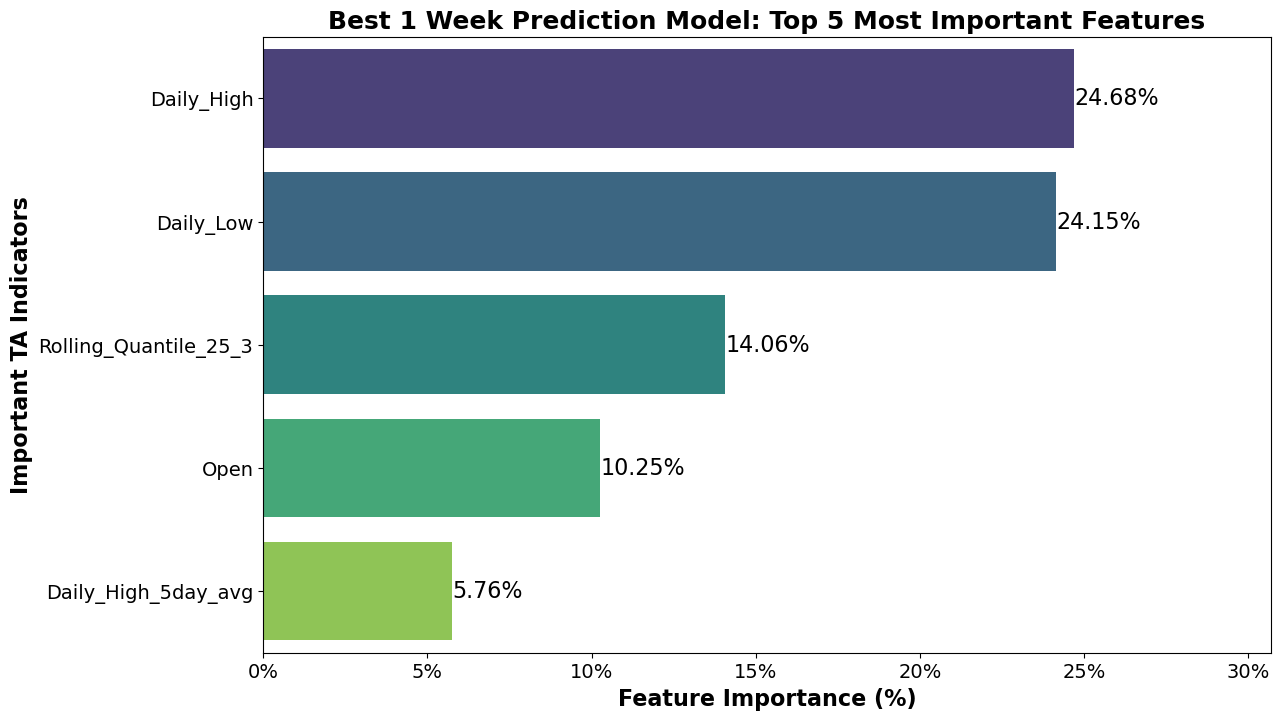

In [420]:
# Convert to NumPy arrays (ensuring correct types) 
features = np.array([feature for feature, importance in sorted_features_1_week_md_3[:5]])  # Extract feature names
importances = np.array([importance for feature, importance in sorted_features_1_week_md_3[:5]])  # Extract importances

# Create a bar plot
plt.figure(figsize=(13, 8))
ax = sns.barplot(x=importances * 100, y=features, palette="viridis")

# Add text labels to the bars (feature importance values)
for i, v in enumerate(importances * 100):
    ax.text(v + 0.01, i, f"{v:.2f}%", va="center", fontsize=16)  # Adjust position & format

# Format x-axis labels to include % sign
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))

# Extend x-axis limits for more space
plt.xlim(0, max(importances * 100) + 6)  # Extend to provide more space on the right

# Add labels and title
plt.xlabel("Feature Importance (%)", fontsize=16, fontweight='bold')  # Bigger x-axis title
plt.ylabel("Important TA Indicators", fontsize=16, fontweight='bold')  # Bigger y-axis title
plt.title("Best 1 Week Prediction Model: Top 5 Most Important Features", fontsize=18, fontweight='bold')  # Bigger title

# Increase font size for y-axis and x-axis tick labels (feature names)
ax.set_yticklabels(features, fontsize=14)
plt.xticks(fontsize=14)  # Increase font size for x-axis labels
# Show the plot
plt.show()


### Trading Simulation
Now that we have chosen our best model, we want to test how well it actually performs in as close to a real world situation as we can get: a  trading simulation. This will be a good test to see if our model is profitable, unprofitable, or breaks even on average across the 25 stocks we trained it on. Before we do that, we need to build a new DataFrame for the simulation to use. To begin building this DataFrame, we'll include our descriptive columns, 'Symbol' and 'Date', our target variable, 'Close', which will be renamed to 'Actual Price', and two new columns called 'Starting Price' and "Predicted Price". 'Starting Price' will just be the 'Actual Price' column shifted 5 days and 'Predicted Price' will be the predicted values from our final best performing model, model 3. Each row will contain the 'Actual Price' (the actual daily closing stock price on that date), the 'Starting Price' (the daily closing stock price from 5 trading days prior), and 'Predicted Price' (the daily closing price predicted for that day). 

In [672]:
# Create copy of stock_data_1_week just incase we need to reference it later
stock_data_1_week_test = stock_data_1_week.copy()

# Make sure date column is in datetime format
stock_data_1_week_test['Date'] = pd.to_datetime(stock_data_1_week_test['Date'], errors='coerce')

# Drop all columns from stock_data_1_week_test except 'Symbol' 'Date', and 'Close'
columns_to_keep = ['Symbol', 'Date', 'Close']
stock_data_1_week_test.drop(columns = [col for col in stock_data_1_week_test.columns if col not in columns_to_keep], inplace=True)

# Filter stock_data_1_week_test to only keep rows where 'Date' also exists in stock_data_test_1_week_md_3 DataFrame
# Then reset index
stock_data_1_week_test = stock_data_1_week_test[stock_data_1_week_test['Date'].isin(stock_data_test_1_week_md_3['Date'])]
stock_data_1_week_test = stock_data_1_week_test.reset_index(drop=True)

# y_pred_1_week_md_3 contains the predicted values for Model 3 test data
# Convert it to a DataFrame
predicted_values_1_week = pd.DataFrame(y_pred_1_week_md_3)

# Combine stock_data_1_week_test and predicted_values_1_week so that we have
# the actual values, predicted values, and descriptive columns all in one DataFrame
pred_one_week = pd.concat([stock_data_1_week_test, predicted_values_1_week], axis=1)

# Rename columns for readability
pred_one_week = pred_one_week.rename(columns={0: 'Predicted Price',
                                                         'Close': 'Actual Price',
                                                         'Close_Target': 'Starting Price'})

# Group by Symbol and shift prices within each Symbol group
# Create 'Starting Price' column by copying 'Actual Price' and doing shift(5), so that
# the current price and price 5 days prior are in the same row

pred_one_week['Starting Price'] = pred_one_week.groupby('Symbol')['Actual Price'].shift(5)
# pred_one_week['Predicted Price'] = pred_one_week.groupby('Symbol')['Predicted Price'].shift(5)
pred_one_week = pred_one_week.dropna(subset=['Predicted Price', 'Starting Price']).reset_index(drop=True)
pred_one_week.head()

,Symbol,Date,Actual Price,Predicted Price,Starting Price
0,AAPL,2023-02-08,150.173935,142.956055,143.758514
1,AAPL,2023-02-09,149.136002,147.918243,149.086563
2,AAPL,2023-02-10,149.502304,148.996994,152.724274
3,AAPL,2023-02-13,152.313950,147.899948,149.986099
4,AAPL,2023-02-14,151.670410,149.721634,152.872543


### Performance Measures and Hedging Options
To further evaluate our model, we will calculate the bullish and bearish values for mean error, standard deviation of the mean error, and predicted rate of return. These performance evaluations are not only useful to judge the effectiveness of our model and deduce interesting statistical conclusions, but also useful to create a hedge strategy based on the errors of our model. Hedging is a way to reduce risk by making another trade to offset potential losses. For example, if our model predicts a price will go up, we can hedge by taking a small portion of our 'Long' position and put it into a 'Short' position. This way, we limit losses if the trade does not go our way. Since we don't want to accidently give future data to trading simulation, each "mean" value is really just a rolling average of the previous 10 values. 

In [673]:
# dont' thtink i need to keep this, confirm before deleting
# the only measure here that is useful is the one that's average magnitude 
# from actual price to predicted price
# now we have our dataframe with the actual price, starting price, and predicted price

# avg magnitude of preditions from starting price and avg of magnitude of actual from starting price

total_actual_diff = {}
total_pred_diff = {}
actual_pred_diff = {}

total_actual_diff = 0
total_pred_diff = 0 
actual_pred_diff = 0
for i, row in pred_one_week.iterrows():
    total_actual_diff += (((abs(row['Actual Price'] - row['Starting Price'])) / row['Starting Price']) * 100)
    total_pred_diff += (((abs(row['Predicted Price'] - row['Actual Price'])) / row['Starting Price']) * 100)
    actual_pred_diff += (((abs(row['Predicted Price'] - row['Actual Price'])) / row['Actual Price']) * 100)

# Compute averages by dividing by the number of rows in each DataFrame
average_actual_diff = (total_actual_diff / len(df)) if len(df) > 0 else 0  
average_pred_diff = (total_pred_diff / len(df)) if len(df) > 0 else 0  
avg_pred_actual_diff = (actual_pred_diff / len(df)) if len(df) > 0 else 0 

print(f"Average Percent Magnitude from Starting Price to Actual Price: {average_actual_diff:.2f}%")
print(f"Average Magnitude from Starting Price to Predicted Price: {average_pred_diff:.2f}%")
print(f"Average Magnitude from Actual Price to Predicted Price: {avg_pred_actual_diff:.2f}%\n")


Average Percent Magnitude from Starting Price to Actual Price: 5.27%
Average Magnitude from Starting Price to Predicted Price: 8.74%
Average Magnitude from Actual Price to Predicted Price: 8.65%



In [674]:
# Don't think i need this, confirm before deleting
# keeping this for now
total_pred_up = {}
total_pred_down = {}
total_actual_increase = {}
total_actual_decrease = {}
total_pred_wrong_direction = {}
correct_pred_up = {}
correct_pred_down = {}
correct_pred_up_over_estimate = {}
correct_pred_up_under_estimate = {}
correct_pred_down_over_estimate = {}
correct_pred_down_under_estimate = {}
total_over_estimate_bull_mag_percent = {}
total_under_estimate_bull_mag_percent = {}
total_over_estimate_bear_mag_percent = {}
total_under_estimate_bear_mag_percent = {}

total_pred_up = 0
total_pred_down = 0
total_actual_increase = 0
total_actual_decrease = 0
total_pred_wrong_direction = 0
correct_pred_up = 0
correct_pred_down = 0
correct_pred_up_over_estimate = 0
correct_pred_up_under_estimate = 0
correct_pred_down_over_estimate = 0
correct_pred_down_under_estimate = 0
total_over_estimate_bull_mag_percent = 0
total_under_estimate_bull_mag_percent = 0
total_over_estimate_bear_mag_percent = 0
total_under_estimate_bear_mag_percent = 0
for i, row in pred_one_week.iterrows():
    pred_change = row['Predicted Price'] - row['Starting Price']
    actual_change = row['Actual Price'] - row['Starting Price']
    if pred_change > 0:
        total_pred_up += 1
    elif pred_change < 0:
        total_pred_down += 1

    if actual_change > 0:
        total_actual_increase += 1
    elif actual_change < 0:
        total_actual_decrease += 1

    if pred_change > 0 and actual_change > 0 and pred_change > actual_change:
        correct_pred_up += 1
        correct_pred_up_over_estimate += 1
        total_over_estimate_bull_mag_percent += (abs(pred_change - actual_change) / row['Actual Price']) * 100

    elif pred_change > 0 and actual_change > 0 and pred_change < actual_change:
        correct_pred_up += 1
        correct_pred_up_under_estimate += 1
        total_under_estimate_bull_mag_percent += (abs(pred_change - actual_change) / row['Actual Price']) * 100
    
    elif pred_change < 0  and actual_change < 0 and abs(pred_change) > abs(actual_change):
        correct_pred_down += 1
        correct_pred_down_over_estimate += 1
        total_over_estimate_bear_mag_percent += (abs(pred_change - actual_change) / row['Actual Price']) * 100
    
    elif pred_change < 0  and actual_change < 0 and abs(pred_change) < abs(actual_change):
        correct_pred_down += 1
        correct_pred_down_under_estimate += 1
        total_under_estimate_bear_mag_percent += (abs(pred_change - actual_change) / row['Actual Price']) * 100
    
    if pred_change > 0  and actual_change < 0:
        total_pred_wrong_direction += 1
    elif pred_change < 0  and actual_change > 0:
        total_pred_wrong_direction += 1

correct_price_increase = (((correct_pred_up / total_pred_up
                                ) * 100) if total_pred_up else 0)

correct_price_decrease = (((correct_pred_down / total_pred_down
                                ) * 100) if total_pred_down else 0)

pred_wrong_direction = (((total_pred_wrong_direction / (
    total_pred_up + total_pred_down)) * 100) if (
    total_pred_up + total_pred_down) else 0)

over_estimate_correct_bull_pred = (((correct_pred_up_over_estimate / correct_pred_up
                                ) * 100) if correct_pred_up else 0)

under_estimate_correct_bull_pred = (((correct_pred_up_under_estimate / correct_pred_up
                                ) * 100) if correct_pred_up else 0)

over_estimate_correct_bear_pred = (((correct_pred_down_over_estimate / correct_pred_down
                                ) * 100) if correct_pred_down else 0)

under_estimate_correct_bear_pred = (((correct_pred_down_under_estimate / correct_pred_down
                                ) * 100) if correct_pred_down else 0)

avg_bull_over_estimate_mag_percent = ((total_over_estimate_bull_mag_percent / correct_pred_up_over_estimate
                                ) if correct_pred_up_over_estimate else 0)

avg_bull_under_estimate_mag_percent = ((total_under_estimate_bull_mag_percent / correct_pred_up_under_estimate
                                ) if correct_pred_up_under_estimate else 0)

avg_bear_over_estimate_mag_percent = ((total_over_estimate_bear_mag_percent / correct_pred_down_over_estimate
                                ) if correct_pred_down_over_estimate else 0)

avg_bear_under_estimate_mag_percent = ((total_under_estimate_bear_mag_percent / correct_pred_down_under_estimate
                                ) if correct_pred_down_under_estimate else 0)

print(f'Total correct bullish predictions: {correct_pred_up}')
print(f'Total correct bearish predictions: {correct_pred_down}\n')
print(f'Correct Bullish Predictions: {correct_price_increase:.2f}%')
print(f'Correct Bearish Predictions: {correct_price_decrease:.2f}%\n')
print(f'Missed Direction: {pred_wrong_direction:.2f}%\n')
print(f'Percentage of Overestimated Correct Bullish Predictions: {over_estimate_correct_bull_pred:.2f}%')
print(f'Average magnitude of Overestimated Correct Bullish Predictions: {avg_bull_over_estimate_mag_percent:.2f}%\n')
print(f'Percentage of Underestimated Correct Bullish Predictions: {under_estimate_correct_bull_pred:.2f}%')
print(f'Average magnitude of Underestimated Correct Bullish Predictions: {avg_bull_under_estimate_mag_percent:.2f}%\n')
print(f'Percentage of Overestimated Correct Bearish Predictions: {over_estimate_correct_bear_pred:.2f}%')
print(f'Average magnitude of Overestimated Correct Bearish Predictions: {avg_bear_over_estimate_mag_percent:.2f}%\n')
print(f'Percentage of Underestimated Correct Bearish Predictions: {under_estimate_correct_bear_pred:.2f}%')
print(f'Average magnitude of Underestimated Correct Bearish Predictions: {avg_bear_under_estimate_mag_percent:.2f}%\n')


Total correct bullish predictions: 4043
Total correct bearish predictions: 2482

Correct Bullish Predictions: 57.03%
Correct Bearish Predictions: 43.27%

Missed Direction: 49.02%

Percentage of Overestimated Correct Bullish Predictions: 25.38%
Average magnitude of Overestimated Correct Bullish Predictions: 1.04%

Percentage of Underestimated Correct Bullish Predictions: 74.62%
Average magnitude of Underestimated Correct Bullish Predictions: 2.70%

Percentage of Overestimated Correct Bearish Predictions: 38.20%
Average magnitude of Overestimated Correct Bearish Predictions: 9.87%

Percentage of Underestimated Correct Bearish Predictions: 61.80%
Average magnitude of Underestimated Correct Bearish Predictions: 2.64%



In [675]:
# don't think i need this, confirm before deleting
#could be  useful i suppose, but im claculating a bullish mean error later so, 
# interesting info so i might keep it

# cool stats, can't use it for trading model because it uses future data
# mean error
# we'll do one for up scenarios, one for down scenarios, then one overall

bullish_count = 0
bearish_count = 0
bullish_sum = 0
bearish_sum = 0
for i, row in pred_one_week.iterrows():
    actual_bull = row['Actual Price'] > row['Starting Price']
    actual_bear = row['Actual Price'] < row['Starting Price']
    predicted_bull = row['Predicted Price'] > row['Starting Price']
    predicted_bear = row['Predicted Price'] < row['Starting Price']
    if actual_bull and predicted_bull:
        bullish_sum += (row['Actual Price'] - row['Predicted Price'])
        bullish_count += 1
    elif actual_bear and predicted_bear:
        bearish_sum += (row['Actual Price'] - row['Predicted Price'])
        bearish_count +=1

bullish_mean_error = (bullish_sum / bullish_count)
bearish_mean_error = (bearish_sum / bearish_count)
bullish_mean_error_percent = ((bullish_mean_error / pred_one_week['Starting Price'].mean()) * 100)
bearish_mean_error_percent = ((bearish_mean_error / pred_one_week['Starting Price'].mean()) * 100)

print(f'Bullish Mean Error One Week Prediction: {bullish_mean_error_percent:.2f}%')
print(f'Bearish Mean Error One Week Prediction: {bearish_mean_error_percent:.2f}%\n')
# this is good stuff
# i think this is slightly better than the overestimation/underestimation calculation i did above

Bullish Mean Error One Week Prediction: 1.27%
Bearish Mean Error One Week Prediction: 11.07%



### Mean Error
Mean error measures how far off the predicted price is from the actual price, as a percentage of the starting price. Evaluating this for both bullish and bearish scenarios can tell us if the model systematically overestimates or underestimates price movements. Making sure to group by 'Symbol', we calculate both bullish mean error and bearish mean error. For both mean errors, we'll then create a 10-day rolling average to smooth out fluctuations over time. 

In [676]:
# Calculate and create columns for Bullish and Bearish Mean Error

bullish_errors = [] # List to store bullish predictions
bearish_errors = [] # List to store Bearish Predictions

# Group predictions by stock symbol
for symbol, group in pred_one_week.groupby('Symbol'):

    # Shift Predicted, Actual, and Starting price to prevent future data leakage
    group['Shifted Predicted Price'] = group['Predicted Price'].shift(1)
    group['Shifted Actual Price'] = group['Actual Price'].shift(1)
    group['Shifted Starting Price'] = group['Starting Price'].shift(1)   

    # Iterate through each row and confirm actual price direction and predicted price direction
    for i, row in group.iterrows():
        actual_bull = row['Shifted Actual Price'] > row['Shifted Starting Price']
        actual_bear = row['Shifted Actual Price'] < row['Shifted Starting Price']
        predicted_bull = row['Shifted Predicted Price'] > row['Shifted Starting Price']
        predicted_bear = row['Shifted Predicted Price'] < row['Shifted Starting Price']

        # If actual price and predicted price are both bullish, calculate bullish error
        if actual_bull and predicted_bull:
            error_bull = (row['Shifted Actual Price'] - row['Shifted Predicted Price']) / row['Shifted Starting Price']
            bullish_errors.append(error_bull)
        else:
            bullish_errors.append(0) # If not, append 0. Need to do this to maintain same index/row length

        # If actual price and predicted price are both bearish, calculate bearish error
        if actual_bear and predicted_bear:
            error_bear = (row['Shifted Actual Price'] - row['Shifted Predicted Price']) / row['Shifted Starting Price']
            bearish_errors.append(error_bear)
        else:
            bearish_errors.append(0)

# Add calculated Bullish/Bearish errors to DataFrame
pred_one_week['Bullish Error'] = bullish_errors
pred_one_week['Bearish Error'] = bearish_errors

# Calculate expanding averages within each symbol's group
pred_one_week['Rolling Bullish Mean Error'] = pred_one_week.groupby(
    'Symbol')['Bullish Error'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())

pred_one_week['Rolling Bearish Mean Error'] = pred_one_week.groupby(
    'Symbol')['Bearish Error'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())

pred_one_week.head()

,Symbol,Date,Actual Price,Predicted Price,Starting Price,Bullish Error,Bearish Error,Rolling Bullish Mean Error,Rolling Bearish Mean Error
0,AAPL,2023-02-08,150.173935,142.956055,143.758514,0.0,0.000000,0.0,0.000000
1,AAPL,2023-02-09,149.136002,147.918243,149.086563,0.0,0.000000,0.0,0.000000
2,AAPL,2023-02-10,149.502304,148.996994,152.724274,0.0,0.000000,0.0,0.000000
3,AAPL,2023-02-13,152.313950,147.899948,149.986099,0.0,0.003309,0.0,0.000827
4,AAPL,2023-02-14,151.670410,149.721634,152.872543,0.0,0.000000,0.0,0.000662


# Standard Deviation of the Mean Error
Using the bullish and bearish mean error we just calculated, we can find the standard deviation of the bullish and bearish mean errors. This tells us how much the values in the dataset deviate from the mean. If standard deviations are far from the mean, it means the data is volatile and therefore more caution should be taken with the trade. 

In [677]:
# Calculate Standard Deviation of the Error and rolling MA of that value
# standard deviation: tells you how much the values in a dataset deviate from the mean
# it tells you how spread out the data is; whether its stable or volatile

# Calculate rolling standard deviation for bullish mean error with a window size of 10
pred_one_week['Rolling Bullish STD'] = pred_one_week.groupby('Symbol')['Bullish Error'].transform(lambda x: x.rolling(window=10, min_periods=1).std())

# Calculate rolling standard deviation for bearish mean error with a window size of 10
pred_one_week['Rolling Bearish STD'] = pred_one_week.groupby('Symbol')['Bearish Error'].transform(lambda x: x.rolling(window=10, min_periods=1).std())

# Backfill missing values in the rolling bullish standard deviation column within each symbol
pred_one_week['Rolling Bullish STD'] = pred_one_week.groupby('Symbol')['Rolling Bullish STD'].apply(lambda group: group.fillna(method='bfill')).reset_index(level=0, drop=True)

# Backfill missing values in the rolling bearish standard deviation column within each symbol
pred_one_week['Rolling Bearish STD'] = pred_one_week.groupby('Symbol')['Rolling Bearish STD'].apply(lambda group: group.fillna(method='bfill')).reset_index(level=0, drop=True)

pred_one_week.head()

,Symbol,Date,Actual Price,Predicted Price,Starting Price,Bullish Error,Bearish Error,Rolling Bullish Mean Error,Rolling Bearish Mean Error,Rolling Bullish STD,Rolling Bearish STD
0,AAPL,2023-02-08,150.173935,142.956055,143.758514,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,AAPL,2023-02-09,149.136002,147.918243,149.086563,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,AAPL,2023-02-10,149.502304,148.996994,152.724274,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,AAPL,2023-02-13,152.313950,147.899948,149.986099,0.0,0.003309,0.0,0.000827,0.0,0.001654
4,AAPL,2023-02-14,151.670410,149.721634,152.872543,0.0,0.000000,0.0,0.000662,0.0,0.001480


### Rate of Return
Whether the model predicts a bullish (price will increase) or bearish (price will decrease) trade, a rate of return can be calculated. If the model predicted price will go up and it did, the rate of return will be positive. If the actual price did not go up, the rate of return will be negative. if the model predicted price will go down and it did, the rate of return will be positive. If the actual price did not decrease, the rate of return will be negative. This is calculated for both bullish and bearish scenarios and a 10day rolling average window is added. 

In [678]:
# Create function to calculate Rate of Return of based on predicted values

def ror(df):
    # Identify Bullish and Bearish moves
    bullish_move = df['Actual Price'] > df['Starting Price']
    bearish_move = df['Actual Price'] < df['Starting Price']
    
    # For bullish moves, calculate ROR
    df.loc[bullish_move, 'Predicted ROR'] = (df.loc[bullish_move, 'Predicted Price'] - df.loc[bullish_move, 'Starting Price']) / df.loc[bullish_move, 'Starting Price']
    
    # For bearish moves, calculate ROR
    df.loc[bearish_move, 'Predicted ROR'] = (df.loc[bearish_move, 'Starting Price'] - df.loc[bearish_move, 'Predicted Price']) / df.loc[bearish_move, 'Starting Price']
    
    # Calculate Rolling Predicted ROR within each symbol over a 10-day window
    df['Rolling Predicted ROR'] = df.groupby('Symbol')['Predicted ROR'].transform(lambda x: x.rolling(window=10, min_periods=1).mean())

    return df

# Apply ror() function to pred_one_week DataFrame
pred_one_week = ror(pred_one_week)

# Shift Rolling Predicted ROR by 1 to prevent future data leakage
pred_one_week['Rolling Predicted ROR'] = pred_one_week['Rolling Predicted ROR'].shift(1)

# Backward fill NaN values in Rolling Predicted ROR
pred_one_week['Rolling Predicted ROR'] = pred_one_week.groupby('Symbol')['Rolling Predicted ROR'].apply(
    lambda group: group.fillna(method='bfill', limit=1)
).reset_index(level=0, drop=True)  

pred_one_week.head()

,Symbol,Date,Actual Price,Predicted Price,Starting Price,Bullish Error,Bearish Error,Rolling Bullish Mean Error,Rolling Bearish Mean Error,Rolling Bullish STD,Rolling Bearish STD,Predicted ROR,Rolling Predicted ROR
0,AAPL,2023-02-08,150.173935,142.956055,143.758514,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.005582,-0.005582
1,AAPL,2023-02-09,149.136002,147.918243,149.086563,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.007837,-0.005582
2,AAPL,2023-02-10,149.502304,148.996994,152.724274,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.024405,-0.006709
3,AAPL,2023-02-13,152.313950,147.899948,149.986099,0.0,0.003309,0.0,0.000827,0.0,0.001654,-0.013909,0.003662
4,AAPL,2023-02-14,151.670410,149.721634,152.872543,0.0,0.000000,0.0,0.000662,0.0,0.001480,0.020611,-0.000731


### Stock Borrow Fee and Trade Fee
In scenarios where our stock is a bearish prediction or we are hedging to the downside to protect losses, we will be shorting stocks, which means we borrow stocks from a broker, sell the shares, then buy them back at a later date (5 trading days later), and return the stocks to the broker. In an ideal situation, we borrow the stocks from the broker, sell them, the price of the stocks decreases, we then buy the stocks back for a lower price, return the stocks to the broker, and profit from the difference. If the stocks increase during this time, we lose profit. In shorting, the period for which you are holding the stocks comes with a fee called a stock borrow fee, which is typically around 3% APY. To add accuracy to our simulation, we calculate how many days we are holding each short trade and incorporate the stock borrow fee in our trade. 

On top of this, each broker charges a fee to make a trade. The fee is typically around 0.25% per trade. Therefore, calculated into each trade will be a trade fee of 0.25%. 

In [679]:
# Calculate length of each trade (in days) 5 trading days apart

# Using average number of trading days in a calendar year
# calculate average trading days per week and average non-trading days per week
# Add them together to get the average length of holding a trade
# This is to calculate how many days we would be charged for a stock borrow fee
# in a shorting situation
avg_trading_days_per_calendar_year = 252
non_trading_days_per_year = 365 - 252
avg_non_trading_days_per_week = (non_trading_days_per_year / (365)) * 7
avg_trading_days_per_calendar_day = (avg_trading_days_per_calendar_year / 365)
avg_trading_days_1_week = avg_trading_days_per_calendar_day * 7
avg_days_holding_trade_1_week = avg_trading_days_1_week + avg_non_trading_days_per_week

print(f'Average length holding 1 week trade: {avg_days_holding_trade_1_week}')


# Create function to calculate how many calendar days are between each trade
def length_holding_trade(df, avg_days_holding_trade_1_week):
    # Ensure 'Date' is in datetime format
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Shift 'Date' by 5 trading days within each 'Symbol'
    df['Trade Entry Date'] = df.groupby('Symbol')['Date'].shift(5)

    # Calculate actual holding time in days
    df['Lengh of Trade (Days)'] = (df['Date'] - df['Trade Entry Date']).dt.days

    # Fill in missing values with the calculated average holding duration
    df['Lengh of Trade (Days)'].fillna(avg_days_holding_trade_1_week, inplace=True)

    # Drop intermediate columns
    df.drop(columns=['Trade Entry Date'], inplace=True)

    return df

# Apply length_holding_trade function to pred_one_week dataset
pred_one_week = length_holding_trade(pred_one_week, avg_days_holding_trade_1_week)

pred_one_week.head()

Average length holding 1 week trade: 7.0


,Symbol,Date,Actual Price,Predicted Price,Starting Price,Bullish Error,Bearish Error,Rolling Bullish Mean Error,Rolling Bearish Mean Error,Rolling Bullish STD,Rolling Bearish STD,Predicted ROR,Rolling Predicted ROR,Lengh of Trade (Days)
0,AAPL,2023-02-08,150.173935,142.956055,143.758514,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.005582,-0.005582,7.0
1,AAPL,2023-02-09,149.136002,147.918243,149.086563,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.007837,-0.005582,7.0
2,AAPL,2023-02-10,149.502304,148.996994,152.724274,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.024405,-0.006709,7.0
3,AAPL,2023-02-13,152.313950,147.899948,149.986099,0.0,0.003309,0.0,0.000827,0.0,0.001654,-0.013909,0.003662,7.0
4,AAPL,2023-02-14,151.670410,149.721634,152.872543,0.0,0.000000,0.0,0.000662,0.0,0.001480,0.020611,-0.000731,7.0


### Bullish and Bearish Hedge
Our simple hedge strategy is going to utilize bullish/bearish mean error, bullish/bearish standard deviation, and predicted rate of return. If the model's prediction is bullish, we add up the values of bullish mean error, bullish standard deviation, and predicted rate of return. If bullish mean error is > 0, it is left out of the hedge and if predicted rate of return is > 0, it is also left out of the hedge. If the model's predicted is bearish, we add up the values just like the bullish prediction. However, if bearish mean error is < 0, it is left out of the hedge and if predicted rate of return is > 0, it is also left out of the hedge. This gives us two new columns 'Bullish Hedge' and 'Bearish Hedge' which we can use in our trading simulation to easily add a hedge to our trades. 

In [680]:
# Create Bullish and Bearish Hedge columns with calculated hedge values

# Initialize empty lists to store hedge values
bullish_hedge = []
bearish_hedge = []

# Iterate over each stock symbol in the dataset
for symbol, group in pred_one_week.groupby('Symbol'):

    # Shift columns to only use previous rows value's and prevent future data leakage
    group['Shifted Predicted Price'] = group['Predicted Price'].shift(1)
    group['Shifted Actual Price'] = group['Actual Price'].shift(1)
    group['Shifted Starting Price'] = group['Starting Price'].shift(1)

    # Iterate over each row in the group
    for i, row in group.iterrows():
        # Determine if the Predicted Price indicates a Bullish or Bearish move
        bullish_pred = row['Shifted Predicted Price'] > row['Shifted Starting Price']
        bearish_pred = row['Shifted Predicted Price'] < row['Shifted Starting Price']

        # Extract statistical values to build hedge
        bullish_mean_error = row['Rolling Bullish Mean Error']
        bearish_mean_error = row['Rolling Bearish Mean Error']
        bullish_stdev = row['Rolling Bullish STD']
        bearish_stdev = row['Rolling Bearish STD']
        pred_ror = row['Rolling Predicted ROR']

        # Calculate hedge in bullish scenario
        if bullish_pred:
            hedge = 0
            hedge += bullish_stdev # Add Bullish Standard Deviation
            if bullish_mean_error < 0:
                hedge += abs(bullish_mean_error) # Add Bullish Mean Error if it
                                                 # has a value less than 0
            if pred_ror < 0:
                hedge += abs(pred_ror)           # Add Predicted ROR value if it
                                                 # is less than 0            
            bullish_hedge.append(hedge) 
        else:
            bullish_hedge.append(0) # If trade is not bullish, hedge value is 0

        # Calculate hedge in bearish scenario
        if bearish_pred:
            hedge = 0
            hedge += bearish_stdev # Add Bearish Standard Deviation
            if bearish_mean_error > 0:
                hedge += bearish_mean_error # Add Bearish Mean Error if it
                                            # has a value greater than 0
            if pred_ror < 0:
                hedge += abs(pred_ror)      # Add Predicted ROR value if it
                                            # is less than 0            
            bearish_hedge.append(hedge)     
        else:
            bearish_hedge.append(0)         # If trade is not Bearish, hedge value is 0

# Add calculated hedge values as new columns in our DataFrame
pred_one_week['Bullish Hedge'] = bullish_hedge
pred_one_week['Bearish Hedge'] = bearish_hedge
pred_one_week.head()

,Symbol,Date,Actual Price,Predicted Price,Starting Price,Bullish Error,Bearish Error,Rolling Bullish Mean Error,Rolling Bearish Mean Error,Rolling Bullish STD,Rolling Bearish STD,Predicted ROR,Rolling Predicted ROR,Lengh of Trade (Days),Bullish Hedge,Bearish Hedge
0,AAPL,2023-02-08,150.173935,142.956055,143.758514,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.005582,-0.005582,7.0,0.0,0.000000
1,AAPL,2023-02-09,149.136002,147.918243,149.086563,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.007837,-0.005582,7.0,0.0,0.005582
2,AAPL,2023-02-10,149.502304,148.996994,152.724274,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.024405,-0.006709,7.0,0.0,0.006709
3,AAPL,2023-02-13,152.313950,147.899948,149.986099,0.0,0.003309,0.0,0.000827,0.0,0.001654,-0.013909,0.003662,7.0,0.0,0.002481
4,AAPL,2023-02-14,151.670410,149.721634,152.872543,0.0,0.000000,0.0,0.000662,0.0,0.001480,0.020611,-0.000731,7.0,0.0,0.002872


In [681]:
# don't think i need this, confirm before deleting

important_columns = ['Symbol', 'Date', 'Actual Price', 'Starting Price', 'Predicted Price', 
                    'Bullish Hedge', 'Bearish Hedge', 'Rolling Bullish Mean Error', 
                     'Rolling Bearish Mean Error', 'Rolling Bullish STD', 
                     'Rolling Bearish STD', 'Rolling Predicted ROR']
pred_one_week = pred_one_week[important_columns + [col for col in pred_one_week.columns if col not in important_columns]]

pred_one_week.head()

,Symbol,Date,Actual Price,Starting Price,Predicted Price,Bullish Hedge,Bearish Hedge,Rolling Bullish Mean Error,Rolling Bearish Mean Error,Rolling Bullish STD,Rolling Bearish STD,Rolling Predicted ROR,Bullish Error,Bearish Error,Predicted ROR,Lengh of Trade (Days)
0,AAPL,2023-02-08,150.173935,143.758514,142.956055,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.005582,0.0,0.000000,-0.005582,7.0
1,AAPL,2023-02-09,149.136002,149.086563,147.918243,0.0,0.005582,0.0,0.000000,0.0,0.000000,-0.005582,0.0,0.000000,-0.007837,7.0
2,AAPL,2023-02-10,149.502304,152.724274,148.996994,0.0,0.006709,0.0,0.000000,0.0,0.000000,-0.006709,0.0,0.000000,0.024405,7.0
3,AAPL,2023-02-13,152.313950,149.986099,147.899948,0.0,0.002481,0.0,0.000827,0.0,0.001654,0.003662,0.0,0.003309,-0.013909,7.0
4,AAPL,2023-02-14,151.670410,152.872543,149.721634,0.0,0.002872,0.0,0.000662,0.0,0.001480,-0.000731,0.0,0.000000,0.020611,7.0


### Trading Simulation: Logic
We initalize a trading account to $100,000 to start and each trade uses 5% of our portfolio. Each trade is charged a trade fee and if shorting, that  position is charged a stock borrow fee. In order to limit the number of trades, logic has been added to skip days before trading. If num_iteration_skips is > 0, it will loop through the specified number of rows until skip_iteration resets to 0, then will calcualte that trade. This explanation is under the assumption that num_iteration_skips is 0. This trading simulation works by grouping by stock ticker and iterating through each row. Upon each iteration, if the model's predicted price is greater than the starting price (price one week ago), then the trade is bullish. If the model's predicted price is less than the starting price, then the trade is bearish. 

If the trade is bullish, 5% of current portfolio will be calculated and we find the max number of shares we can buy for the price of the starting value. We then execute that trade by multiplying number of shares we have by starting price, subtracting the total cost of that trade from our trading account value, then, we calculate the end of our position by multiplying our the number of shares we bought by the actual price. We then add the value of that back to our trading account. 

If the trade is bearish, the same logic will be used to find the number of shares to trade, except this time since we are shorting, we borrow the shares to sell. The value of the short is added to our trading account, then those shares are multiplied by actual price, and that value is subtracted from our trading account. The profit/loss is kept track of, as well as the number of total bullish and bearish trades, the positive bullish/bearish and negative bullish/bearish trades, and the percent gain/loss. 

Two simluations will be run, one without our hedging strategy and one with. How hedging works is once a position is established, whether bullish or bearish, if the hedge column for that direction (bull_hedge or bear_hedge) is > 0, that value is multiplied by a risk multiplier (set to 1 by default), the hedge portion is then multiplied by the total trade amount to calculate the hedge portion of the trade. That hedge portion is then subtracted from the main position to get the reduced main trade value and hedge trade value For example, if it is a bullish trade and bull_hedge = 0.07, bull_hedge * risk multipler (3) = 0.21 hedge portion. Bullish trade is now 1.00 - 0.21 = 0.79. In this scenario, 79% of the full trading position enters a bullish position (buys shares), and the remaining 21% enters a bearish position (short sell shares). The goal of this hedge is to try to realistically account for errors in the model, as well as manage risk by limiting loss from trade. 

### Trading Simulation with no hedge


In [ ]:
# Trade Simulation with no hedge
# risk_mult = 0

# Initialize list to store overall results of trading simulation
overall_results = []

# Group the dataframe by 'Symbol' and run the simulation for each stock separately
for symbol, group in pred_one_week.groupby('Symbol'):
    print(f"\nStarting trading simulation for {symbol}\n")

    # Reset trading account for each stock
    trading_account = 100000
    profit_loss = 0
    bullish_trade_count = 0
    bearish_trade_count = 0
    positive_bullish_trade = 0
    negative_bullish_trade = 0
    positive_bearish_trade = 0
    negative_bearish_trade = 0
    percent_gain = (profit_loss / 100000) * 100
    skip_iterations = 0

    # Loop through each row (each row represents one trade)
    for i, row in group.iterrows():

        # Extract relevant features for trade
        starting_price = row['Starting Price']
        actual_price = row['Actual Price']
        predicted_price = row['Predicted Price']
        trade_date = row['Date']
        length_holding_trade = row['Lengh of Trade (Days)']
        bull_hedge = row['Bullish Hedge']
        bear_hedge = row['Bearish Hedge']

        # Determine trade predictions (bullish or bearish)
        bullish_pred = predicted_price > starting_price
        actual_bull = actual_price > starting_price
        bearish_pred = predicted_price < starting_price
        actual_bear = actual_price < starting_price
        
        # % Portfolio risked per trade
        portfolio_trade_percent = 0.05
      
        # Iteration Skipper: Limit Number of trades over testing timeframe
        num_iteration_skips = 0 
        if skip_iterations > 0:
            skip_iterations -= 1
            continue

        # Position size per trade        
        trade_size = trading_account * portfolio_trade_percent

        # Trade fee: trade_size * trade_fee
        trade_fee = 0.0025

        # Stock borrow fee for short trades
        stock_borrow_fee_percent = 0.03
        total_days_one_year = 365
        stock_borrow_daily_fee = stock_borrow_fee_percent / total_days_one_year

        # Leverage and margin fee
        leverage = 1
        margin_rate = 0.12
        margin_daily_rate = margin_rate / total_days_one_year

        # Risk multiplier for hedging
        risk_mult = 0


        
        # Bullish Prediction trading logic     
        if bullish_pred:
            
            bullish_trade_count += 1
            total_trade_position_value = trade_size
            hedge_portion = 0
            if bull_hedge > 0:
                hedge_portion = bull_hedge * risk_mult

                # Cap hedge at 50%
                hedge_portion = min(hedge_portion, 0.25)
                
            else:
                continue
            bull_hedge_starting_value = total_trade_position_value * hedge_portion
            bull_hedge_starting_share_amount = bull_hedge_starting_value // starting_price

            # Calculate trade fee and stock borrow fee for bullish hedge
            if bull_hedge_starting_share_amount > 0: 
                bull_hedge_starting_trade_cost = bull_hedge_starting_share_amount * starting_price
                bull_hedge_starting_trade_fee = bull_hedge_starting_trade_cost * trade_fee
            else:
                bull_hedge_starting_value = 0

            # Calculate bullish trade value, number of shares to purchase, total cost of trade, and trade fee
            bull_starting_trade_value = total_trade_position_value - bull_hedge_starting_value
            bull_starting_share_amount = bull_starting_trade_value // starting_price
            bull_starting_trade_cost = bull_starting_share_amount * starting_price
            bull_starting_trade_fee = bull_starting_trade_cost * trade_fee

            # Adjust trading_account with bullish trade and hedge trade (if there is a hedge)
            trading_account -= (bull_starting_trade_cost + bull_starting_trade_fee)
            trading_account += (bull_hedge_starting_trade_cost - bull_hedge_starting_trade_fee)

            # Calculate and update final trade values for hedge trade
            bull_hedge_actual_trade_value = (bull_hedge_starting_share_amount * actual_price)
            bull_hedge_actual_trade_fee = bull_hedge_actual_trade_value * trade_fee
            bull_hedge_stock_borrow_fee = bull_hedge_starting_trade_cost * (stock_borrow_daily_fee * length_holding_trade)

            # Update trading_account with end of hedge trade
            trading_account -= (bull_hedge_actual_trade_value + bull_hedge_actual_trade_fee + bull_hedge_stock_borrow_fee)

            # Calculate and update final trade values for hedge trade
            bull_actual_trade_sell = bull_starting_share_amount * actual_price
            bull_actual_trade_fee = bull_actual_trade_sell * trade_fee

            # Update trading_account with end of bull trade
            trading_account += (bull_actual_trade_sell - bull_actual_trade_fee)

            # Calculate bullish_profit for bull trade and bearish_profit for hedge trade
            bearish_profit = (bull_hedge_starting_trade_cost - bull_hedge_starting_trade_fee) - (
                bull_hedge_actual_trade_value + bull_hedge_actual_trade_fee + bull_hedge_stock_borrow_fee)

            bullish_profit = ((bull_actual_trade_sell - bull_actual_trade_fee) - (
                bull_starting_trade_cost + bull_starting_trade_fee))

            # Add both bearish profit and bullish profit to cumulating profit_loss bucket
            profit_loss += bearish_profit
            profit_loss += bullish_profit

            # If total profit (bullish profit + bearish profit) > 0, add 1 count to positive bullish trade
            # If total profit is less than 0, add 1 count to negative bullish trade
            if (bullish_profit + bearish_profit) > 0:
                positive_bullish_trade += 1
            else:
                negative_bullish_trade += 1

            

        # Bearish Prediction trading logic       
        elif bearish_pred:

            bearish_trade_count += 1
            total_trade_position_value = trade_size
            hedge_portion = 0
            if bear_hedge > 0:
                hedge_portion =  bear_hedge * risk_mult

                # Cap hedge at 50%
                hedge_portion = min(hedge_portion, 0.25)
                
            else:
                continue
                
            bear_hedge_starting_value = total_trade_position_value * hedge_portion
            bear_hedge_starting_share_amount = bear_hedge_starting_value // starting_price

            # Calculate cost of bearish hedge trade
            if bear_hedge_starting_share_amount > 0: 
                bear_hedge_starting_trade_cost = bear_hedge_starting_share_amount * starting_price
                bear_hedge_starting_trade_fee = bear_hedge_starting_trade_cost * trade_fee
            else:
                bear_hedge_starting_value = 0

            # Update trade values, get number of shares, get total trade cost, and calculate trade fee of bearish trade
            bear_starting_trade_value = total_trade_position_value - bear_hedge_starting_value
            bear_starting_share_amount = bear_starting_trade_value // starting_price
            bear_starting_trade_cost = bear_starting_share_amount * starting_price
            bear_starting_trade_fee = bear_starting_trade_cost * trade_fee

            # Adjust trading_account with bear trade value and hedge trade value
            trading_account -= (bear_hedge_starting_trade_cost + bear_hedge_starting_trade_fee)
            trading_account += (bear_starting_trade_cost - bear_starting_trade_fee)

            # Calculate final hedge trade values
            bear_hedge_actual_trade_value = (bear_hedge_starting_share_amount * actual_price)
            bear_hedge_actual_trade_fee = bear_hedge_actual_trade_value * trade_fee

            # Adjust trading_account with end of hedge trade value 
            trading_account += (bear_hedge_actual_trade_value - bear_hedge_actual_trade_fee)
            
            # Calculate final bearish trade values
            bear_actual_trade_value = bear_starting_share_amount * actual_price
            bear_actual_trade_fee = bear_actual_trade_value * trade_fee
            bear_actual_stock_borrow_fee = bear_hedge_starting_trade_cost * (stock_borrow_daily_fee * length_holding_trade)

            # Adjust trading_account with end of bearish trade value
            trading_account -= (bear_actual_trade_value + bear_actual_trade_fee + bear_actual_stock_borrow_fee)

            # Calculate bearish profit (profits from bearish trade)
            # and bullish profits (profits from hedge)
            bearish_profit = (bear_starting_trade_cost - bear_starting_trade_fee) - (
                bear_actual_trade_value + bear_actual_trade_fee + bear_actual_stock_borrow_fee)
                  
            bullish_profit = ((bear_hedge_actual_trade_value - bear_hedge_actual_trade_fee) - (
                bear_hedge_starting_trade_cost + bear_hedge_starting_trade_fee))

            # Add bearish and bullish profit to cumulating profit_loss bucket
            profit_loss += bearish_profit
            profit_loss += bullish_profit

            # If bearish profit + bullish profit > 0, add 1 count of positive bearish trade
            # If bearish profit + bullish profit is < 0, add 1 count of negative bearish trade
            if (bearish_profit + bullish_profit) > 0:
                positive_bearish_trade += 1
            else:
                negative_bearish_trade += 1
                    

        # Iteration Skipping (limits number of trades if num_iteration_skips > 0)
        skip_iterations = num_iteration_skips

        # Check if account has dropped below $75,000 and stop the simulation
        if trading_account <= 75000:
            print(f"Trading account for {symbol} has dropped below $75,000. Stopping simulation.")
            break

    # Calculate percent gain
    percent_gain = (profit_loss / 100000) * 100
    # Store results for each stock symbol
    result = {
        'Symbol': symbol,
        'Ending Account Value': trading_account,
        'Total Profit/Loss': profit_loss,
        'Bullish Trades': bullish_trade_count,
        'Bearish Trades': bearish_trade_count,
        'Positive Bullish Trades': positive_bullish_trade,
        'Negative Bullish Trades': negative_bullish_trade,
        'Positive Bearish Trades': positive_bearish_trade,
        'Negative Bearish Trades': negative_bearish_trade,
        'Percent Gain/Loss': percent_gain
    }
    overall_results.append(result)

    # Print results for the current stock
    print(f"\nResults for {symbol}:")
    print(f'Trade Account Ending Value: ${trading_account:.2f}')
    print(f'Total Profit/Loss: ${profit_loss:.2f}')
    print(f'Number of Bullish Trades: {bullish_trade_count}')
    print(f'Number of Bearish Trades: {bearish_trade_count}')
    print(f'Number of Positive Bullish Trades: {positive_bullish_trade}')
    print(f'Number of Negative Bullish Trades: {negative_bullish_trade}')
    print(f'Number of Positive Bearish Trades: {positive_bearish_trade}')
    print(f'Number of Negative Bearish Trades: {negative_bearish_trade}')
    print(f'Percentage Gain: {(profit_loss / 100000) * 100}')
    
# Convert overall results to a DataFrame for easier analysis
trade_simulation_results = pd.DataFrame(overall_results)
print("\nFinal summary of all stocks:")
trade_simulation_results = trade_simulation_results.round(2)
trade_simulation_results.head(


### Trade Simulation with No Hedge: Process Data Results.
The results of the simulation are turned into a dataframe which include the stock ticker, the ending account value, the total profit/loss, the number of bullish and bearish trades, the nmber of negative bullish and bearish trades, the number of positive bullish and bearish trades, and the Percent Gain/Loss. Two additional columns are added: Total Profit/Loss and Ending Account Value are copied and put into currency format for readability. 

Using the first and last date of our testing data, we calculate Average Percent Return Per Year and Average Profit Per Trade. 

In [699]:
# Create copy of 'Total Profit/Loss' column but formatted to display as currency for readability
trade_simulation_results['Total Profit/Loss ($)'] = (
    trade_simulation_results['Total Profit/Loss'].apply(
        lambda x: f"${x:,.2f}")
)

# Create copy of 'Ending Account Value' column but formatted to display as currency for readability
trade_simulation_results['Ending Account Value ($)'] = (
    trade_simulation_results['Ending Account Value'].apply(
        lambda x: f"${x:,.2f}")
)

# Select specific columns and reorder to display final results of trading simulation with no hedge
trade_simulation_results = (
    trade_simulation_results[['Symbol', 'Total Profit/Loss ($)', 
                              'Ending Account Value ($)', 'Ending Account Value', 
                              'Total Profit/Loss', 'Bullish Trades', 
                              'Bearish Trades', 'Positive Bullish Trades', 
                              'Negative Bullish Trades', 'Positive Bearish Trades', 
                              'Negative Bearish Trades','Percent Gain/Loss',]]
)

trade_simulation_results.head()

,Symbol,Total Profit/Loss ($),Ending Account Value ($),Ending Account Value,Total Profit/Loss,Bullish Trades,Bearish Trades,Positive Bullish Trades,Negative Bullish Trades,Positive Bearish Trades,Negative Bearish Trades,Percent Gain/Loss
0,AAPL,"$-10,482.91","$89,517.09",89517.09,-10482.91,283,230,98,97,48,85,-10.48
1,ABBV,"$-1,026.37","$98,973.63",98973.63,-1026.37,312,201,106,106,32,58,-1.03
2,AMZN,"$-1,406.85","$98,593.15",98593.15,-1406.85,293,220,87,95,33,67,-1.41
3,AVGO,"$6,468.14","$106,468.14",106468.14,6468.14,317,196,106,110,42,44,6.47
4,BAC,"$-1,541.17","$98,458.83",98458.83,-1541.17,300,213,97,89,40,50,-1.54


In [719]:
# Create copy of trade_simluation_results DataFrame
one_week_trade_simulation = trade_simulation_results.copy()

# Define start date and end date of the trade simulation
start_date = datetime(2023, 2, 8)
end_date = datetime(2025, 2, 25)

# Calculate total number of trading days between start date and end date
duration_of_trading_days = (end_date - start_date).days

# Convert trading duration from days to years
duration_of_trading_years = duration_of_trading_days / 365.25

# Starting value of trade account is $100,000
starting_trade_account_value = 100000

# Calculate average percent return per year based on ending account value and trade duration
one_week_trade_simulation['Avg % Return Per Year'] = ((((
    one_week_trade_simulation['Ending Account Value'] - starting_trade_account_value) / (
        starting_trade_account_value)) / duration_of_trading_years) * 100
)

# Calculate average profit per trade by dividing total profit by the number of total trades
one_week_trade_simulation['Avg Profit per Trade'] = (
    one_week_trade_simulation['Total Profit/Loss'] / (
        one_week_trade_simulation['Bullish Trades'] + (
            one_week_trade_simulation['Bearish Trades']))
)

# Sort simulation results by 'Avg % Return Per Year' in descending order to view 
# most profitable stock symbols
one_week_trade_simulation = one_week_trade_simulation.sort_values(
    by = 'Avg % Return Per Year', ascending=False)

one_week_trade_simulation.head(10)

,Symbol,Total Profit/Loss ($),Ending Account Value ($),Ending Account Value,Total Profit/Loss,Bullish Trades,Bearish Trades,Positive Bullish Trades,Negative Bullish Trades,Positive Bearish Trades,Negative Bearish Trades,Percent Gain/Loss,Avg % Return Per Year,Avg Profit per Trade
15,NVDA,"$8,582.13","$108,582.13",108582.13,8582.13,300,213,109,76,33,52,8.58,4.190672,16.729298
3,AVGO,"$6,468.14","$106,468.14",106468.14,6468.14,317,196,106,110,42,44,6.47,3.158407,12.608460
9,JPM,"$2,418.40","$102,418.40",102418.40,2418.40,305,208,123,86,38,63,2.42,1.180910,4.714230
22,V,"$2,027.89","$102,027.89",102027.89,2027.89,351,162,164,122,29,52,2.03,0.990223,3.953002
21,UNH,"$1,613.49","$101,613.49",101613.49,1613.49,179,334,67,64,124,161,1.61,0.787871,3.145205
24,XOM,"$1,275.74","$101,275.74",101275.74,1275.74,368,145,144,139,24,28,1.28,0.622947,2.486823
17,ORCL,$147.35,"$100,147.35",100147.35,147.35,332,181,121,123,31,50,0.15,0.071951,0.287232
23,WMT,$0.80,"$100,000.80",100000.80,0.80,308,205,130,94,37,70,0.00,0.000391,0.001559
12,MA,$-240.07,"$99,759.93",99759.93,-240.07,299,214,134,110,64,81,-0.24,-0.117227,-0.467973
18,PG,$-931.66,"$99,068.34",99068.34,-931.66,320,193,106,108,37,40,-0.93,-0.454932,-1.816101


### Trade Simulation with No Hedge: Evaluation
We calculate Average Profit Per Year, Average Yearly Return, Average Profit Per Trade, and then the two most important metrics which are Win Ratio and Sharpe Ratio. The Win Ratio is the number of winning trades out of total number of trades. Sharpe Ratio is a measure to evalute the risk-adjusted return of an investment or portfolio. It tells you if the return on trades was worth the risk taken. 


In [701]:
# One Week Prediction Trade Simulation Results

# Calculate average profit per year based on total profit/loss and 
# duration of simulation in years
avg_profit_per_year = (one_week_trade_simulation['Total Profit/Loss'].mean()) / duration_of_trading_years
print(f'Average Profit Per Year: ${avg_profit_per_year:,.2f}')

# Calculate win ratio by counting the number of positive profit/loss entries and
# dividing by total number of trades
win_ratio = (
    one_week_trade_simulation[one_week_trade_simulation['Total Profit/Loss'] > 0].shape[0] / (
        one_week_trade_simulation.shape[0])
)
print(f'win ratio: {win_ratio*100}%')

# Calculate the Sharpe Ratio, which measures return relative to it's volatility
# Sharpe Ratio indicates if the profit from trade was worth the risk taken
# If Sharpe Ratio > 0, trade was worth the risk. If Sharpe Ratio < 0, trade was not worth the risk
sharp_ratio = (one_week_trade_simulation['Total Profit/Loss'].mean(
) / one_week_trade_simulation['Total Profit/Loss'].std())
print(f'sharpe ratio: {sharp_ratio:.2f}')

# Calculate average yearly return using the 'Avg % Return Per Year' column
avg_percent_yearly_return = one_week_trade_simulation['Avg % Return Per Year'].mean()
print(f'Avg Yearly Return: {avg_percent_yearly_return:.2f}%')

# Calculate average profit per trade by taking the mean of 'Avg Profit per Trade' column
avg_profit_per_trade = one_week_trade_simulation['Avg Profit per Trade'].mean()
print(f'Average Profit Per Trade: ${avg_profit_per_trade:,.2f}')


Average Profit Per Year: $-1,718.99
win ratio: 32.0%
sharp ratio: -0.50
Avg Yearly Return: -1.72%
Average Profit Per Trade: $-7.15


### Trade Simulation with No Hedge Results:
The win ratio is 32%, which is favorable because then we only need a risk-to-reward value of a little over 1:2. The Shape ratio is -.50, which means that the risk with the trades we are taking is not worth it. The average yearly return for using our model with no hedge is -1.72%, with an average loss of $7.15 per trade. Overall, with no hedging, our model was unprofitable.  

### Trade Simulation With Hedge
Our hedge has a risk multiplier of 2.5. This means that if there is a hedge value, it will be multiplied by 2.5. The hedge values came out very small, so they need to be amplified a certain amount for it to be effective. 

In [715]:
# Trade Simulation with Hedge
# risk_mult = 2.5

# Initialize list to store overall results of trading simulation
overall_results_hedge = []

# Group the dataframe by 'Symbol' and run the simulation for each stock separately
for symbol, group in pred_one_week.groupby('Symbol'):
    print(f"\nStarting trading simulation for {symbol}\n")

    # Reset trading account for each stock
    trading_account = 100000
    profit_loss = 0
    bullish_trade_count = 0
    bearish_trade_count = 0
    positive_bullish_trade = 0
    negative_bullish_trade = 0
    positive_bearish_trade = 0
    negative_bearish_trade = 0
    percent_gain = (profit_loss / 100000) * 100
    skip_iterations = 0

    # Loop through each row (each row represents one trade)
    for i, row in group.iterrows():

        # Extract relevant features for trade
        starting_price = row['Starting Price']
        actual_price = row['Actual Price']
        predicted_price = row['Predicted Price']
        trade_date = row['Date']
        length_holding_trade = row['Lengh of Trade (Days)']
        bull_hedge = row['Bullish Hedge']
        bear_hedge = row['Bearish Hedge']

        # Determine trade predictions (bullish or bearish)
        bullish_pred = predicted_price > starting_price
        actual_bull = actual_price > starting_price
        bearish_pred = predicted_price < starting_price
        actual_bear = actual_price < starting_price
        
        # % Portfolio risked per trade
        portfolio_trade_percent = 0.05
      
        # Iteration Skipper: Limit Number of trades over testing timeframe
        num_iteration_skips = 0 
        if skip_iterations > 0:
            skip_iterations -= 1
            continue

        # Position size per trade        
        trade_size = trading_account * portfolio_trade_percent

        # Trade fee: trade_size * trade_fee
        trade_fee = 0.0025

        # Stock borrow fee for short trades
        stock_borrow_fee_percent = 0.03
        total_days_one_year = 365
        stock_borrow_daily_fee = stock_borrow_fee_percent / total_days_one_year

        # Leverage and margin fee
        leverage = 1
        margin_rate = 0.12
        margin_daily_rate = margin_rate / total_days_one_year

        # Risk multiplier for hedging
        risk_mult = 2.5


        
        # Bullish Prediction trading logic     
        if bullish_pred:
            
            bullish_trade_count += 1
            total_trade_position_value = trade_size
            hedge_portion = 0
            if bull_hedge > 0:
                hedge_portion = bull_hedge * risk_mult

                # Cap hedge at 50%
                hedge_portion = min(hedge_portion, 0.25)
                
            else:
                continue
            bull_hedge_starting_value = total_trade_position_value * hedge_portion
            bull_hedge_starting_share_amount = bull_hedge_starting_value // starting_price

            # Calculate trade fee and stock borrow fee for bullish hedge
            if bull_hedge_starting_share_amount > 0: 
                bull_hedge_starting_trade_cost = bull_hedge_starting_share_amount * starting_price
                bull_hedge_starting_trade_fee = bull_hedge_starting_trade_cost * trade_fee
            else:
                bull_hedge_starting_value = 0

            # Calculate bullish trade value, number of shares to purchase, total cost of trade, and trade fee
            bull_starting_trade_value = total_trade_position_value - bull_hedge_starting_value
            bull_starting_share_amount = bull_starting_trade_value // starting_price
            bull_starting_trade_cost = bull_starting_share_amount * starting_price
            bull_starting_trade_fee = bull_starting_trade_cost * trade_fee

            # Adjust trading_account with bullish trade and hedge trade (if there is a hedge)
            trading_account -= (bull_starting_trade_cost + bull_starting_trade_fee)
            trading_account += (bull_hedge_starting_trade_cost - bull_hedge_starting_trade_fee)

            # Calculate and update final trade values for hedge trade
            bull_hedge_actual_trade_value = (bull_hedge_starting_share_amount * actual_price)
            bull_hedge_actual_trade_fee = bull_hedge_actual_trade_value * trade_fee
            bull_hedge_stock_borrow_fee = bull_hedge_starting_trade_cost * (stock_borrow_daily_fee * length_holding_trade)

            # Update trading_account with end of hedge trade
            trading_account -= (bull_hedge_actual_trade_value + bull_hedge_actual_trade_fee + bull_hedge_stock_borrow_fee)

            # Calculate and update final trade values for hedge trade
            bull_actual_trade_sell = bull_starting_share_amount * actual_price
            bull_actual_trade_fee = bull_actual_trade_sell * trade_fee

            # Update trading_account with end of bull trade
            trading_account += (bull_actual_trade_sell - bull_actual_trade_fee)

            # Calculate bullish_profit for bull trade and bearish_profit for hedge trade
            bearish_profit = (bull_hedge_starting_trade_cost - bull_hedge_starting_trade_fee) - (
                bull_hedge_actual_trade_value + bull_hedge_actual_trade_fee + bull_hedge_stock_borrow_fee)

            bullish_profit = ((bull_actual_trade_sell - bull_actual_trade_fee) - (
                bull_starting_trade_cost + bull_starting_trade_fee))

            # Add both bearish profit and bullish profit to cumulating profit_loss bucket
            profit_loss += bearish_profit
            profit_loss += bullish_profit

            # If total profit (bullish profit + bearish profit) > 0, add 1 count to positive bullish trade
            # If total profit is less than 0, add 1 count to negative bullish trade
            if (bullish_profit + bearish_profit) > 0:
                positive_bullish_trade += 1
            else:
                negative_bullish_trade += 1

            

        # Bearish Prediction trading logic       
        elif bearish_pred:

            bearish_trade_count += 1
            total_trade_position_value = trade_size
            hedge_portion = 0
            if bear_hedge > 0:
                hedge_portion =  bear_hedge * risk_mult

                # Cap hedge at 50%
                hedge_portion = min(hedge_portion, 0.25)
                
            else:
                continue
                
            bear_hedge_starting_value = total_trade_position_value * hedge_portion
            bear_hedge_starting_share_amount = bear_hedge_starting_value // starting_price

            # Calculate cost of bearish hedge trade
            if bear_hedge_starting_share_amount > 0: 
                bear_hedge_starting_trade_cost = bear_hedge_starting_share_amount * starting_price
                bear_hedge_starting_trade_fee = bear_hedge_starting_trade_cost * trade_fee
            else:
                bear_hedge_starting_value = 0

            # Update trade values, get number of shares, get total trade cost, and calculate trade fee of bearish trade
            bear_starting_trade_value = total_trade_position_value - bear_hedge_starting_value
            bear_starting_share_amount = bear_starting_trade_value // starting_price
            bear_starting_trade_cost = bear_starting_share_amount * starting_price
            bear_starting_trade_fee = bear_starting_trade_cost * trade_fee

            # Adjust trading_account with bear trade value and hedge trade value
            trading_account -= (bear_hedge_starting_trade_cost + bear_hedge_starting_trade_fee)
            trading_account += (bear_starting_trade_cost - bear_starting_trade_fee)

            # Calculate final hedge trade values
            bear_hedge_actual_trade_value = (bear_hedge_starting_share_amount * actual_price)
            bear_hedge_actual_trade_fee = bear_hedge_actual_trade_value * trade_fee

            # Adjust trading_account with end of hedge trade value 
            trading_account += (bear_hedge_actual_trade_value - bear_hedge_actual_trade_fee)
            
            # Calculate final bearish trade values
            bear_actual_trade_value = bear_starting_share_amount * actual_price
            bear_actual_trade_fee = bear_actual_trade_value * trade_fee
            bear_actual_stock_borrow_fee = bear_hedge_starting_trade_cost * (stock_borrow_daily_fee * length_holding_trade)

            # Adjust trading_account with end of bearish trade value
            trading_account -= (bear_actual_trade_value + bear_actual_trade_fee + bear_actual_stock_borrow_fee)

            # Calculate bearish profit (profits from bearish trade)
            # and bullish profits (profits from hedge)
            bearish_profit = (bear_starting_trade_cost - bear_starting_trade_fee) - (
                bear_actual_trade_value + bear_actual_trade_fee + bear_actual_stock_borrow_fee)
                  
            bullish_profit = ((bear_hedge_actual_trade_value - bear_hedge_actual_trade_fee) - (
                bear_hedge_starting_trade_cost + bear_hedge_starting_trade_fee))

            # Add bearish and bullish profit to cumulating profit_loss bucket
            profit_loss += bearish_profit
            profit_loss += bullish_profit

            # If bearish profit + bullish profit > 0, add 1 count of positive bearish trade
            # If bearish profit + bullish profit is < 0, add 1 count of negative bearish trade
            if (bearish_profit + bullish_profit) > 0:
                positive_bearish_trade += 1
            else:
                negative_bearish_trade += 1
                    

        # Iteration Skipping (limits number of trades if num_iteration_skips > 0)
        skip_iterations = num_iteration_skips

        # Check if account has dropped below $75,000 and stop the simulation
        if trading_account <= 75000:
            print(f"Trading account for {symbol} has dropped below $75,000. Stopping simulation.")
            break

    # Calculate percent gain
    percent_gain = (profit_loss / 100000) * 100
    # Store results for each stock symbol
    result = {
        'Symbol': symbol,
        'Ending Account Value': trading_account,
        'Total Profit/Loss': profit_loss,
        'Bullish Trades': bullish_trade_count,
        'Bearish Trades': bearish_trade_count,
        'Positive Bullish Trades': positive_bullish_trade,
        'Negative Bullish Trades': negative_bullish_trade,
        'Positive Bearish Trades': positive_bearish_trade,
        'Negative Bearish Trades': negative_bearish_trade,
        'Percent Gain/Loss': percent_gain
    }
    overall_results_hedge.append(result)

    # Print results for the current stock
    print(f"\nResults for {symbol}:")
    print(f'Trade Account Ending Value: ${trading_account:.2f}')
    print(f'Total Profit/Loss: ${profit_loss:.2f}')
    print(f'Number of Bullish Trades: {bullish_trade_count}')
    print(f'Number of Bearish Trades: {bearish_trade_count}')
    print(f'Number of Positive Bullish Trades: {positive_bullish_trade}')
    print(f'Number of Negative Bullish Trades: {negative_bullish_trade}')
    print(f'Number of Positive Bearish Trades: {positive_bearish_trade}')
    print(f'Number of Negative Bearish Trades: {negative_bearish_trade}')
    print(f'Percentage Gain: {(profit_loss / 100000) * 100}')
    
# Convert overall results to a DataFrame for easier analysis
trade_sim_hedge_results = pd.DataFrame(overall_results_hedge)
print("\nFinal summary of all stocks:")
trade_sim_hedge_results = trade_sim_hedge_results.round(2)
trade_sim_hedge_results.head()



Starting trading simulation for AAPL


Results for AAPL:
Trade Account Ending Value: $104726.68
Total Profit/Loss: $4726.68
Number of Bullish Trades: 283
Number of Bearish Trades: 230
Number of Positive Bullish Trades: 162
Number of Negative Bullish Trades: 33
Number of Positive Bearish Trades: 11
Number of Negative Bearish Trades: 122
Percentage Gain: 4.726682770866711

Starting trading simulation for ABBV


Results for ABBV:
Trade Account Ending Value: $103081.14
Total Profit/Loss: $3081.14
Number of Bullish Trades: 312
Number of Bearish Trades: 201
Number of Positive Bullish Trades: 173
Number of Negative Bullish Trades: 39
Number of Positive Bearish Trades: 13
Number of Negative Bearish Trades: 77
Percentage Gain: 3.081143559340857

Starting trading simulation for AMZN


Results for AMZN:
Trade Account Ending Value: $103869.92
Total Profit/Loss: $3869.92
Number of Bullish Trades: 293
Number of Bearish Trades: 220
Number of Positive Bullish Trades: 132
Number of Negative Bullish Tr

,Symbol,Ending Account Value,Total Profit/Loss,Bullish Trades,Bearish Trades,Positive Bullish Trades,Negative Bullish Trades,Positive Bearish Trades,Negative Bearish Trades,Percent Gain/Loss
0,AAPL,104726.68,4726.68,283,230,162,33,11,122,4.73
1,ABBV,103081.14,3081.14,312,201,173,39,13,77,3.08
2,AMZN,103869.92,3869.92,293,220,132,50,15,85,3.87
3,AVGO,101608.78,1608.78,317,196,125,91,22,64,1.61
4,BAC,95576.75,-4423.25,300,213,101,85,32,58,-4.42


### Trading Simulation With Hedge: Process Data Results
Repeat the same process as with first simulation.

In [716]:
# Create copy of 'Total Profit/Loss' column but formatted to display as currency for readability
trade_sim_hedge_results['Total Profit/Loss ($)'] = (
    trade_sim_hedge_results['Total Profit/Loss'].apply(
        lambda x: f"${x:,.2f}")
)

# Create copy of 'Ending Account Value' column but formatted to display as currency for readability
trade_sim_hedge_results['Ending Account Value ($)'] = (
    trade_sim_hedge_results['Ending Account Value'].apply(
        lambda x: f"${x:,.2f}")
)

# Select specific columns and reorder to display final results of trading simulation with no hedge
trade_sim_hedge_results = (
    trade_sim_hedge_results[['Symbol', 'Total Profit/Loss ($)', 
                              'Ending Account Value ($)', 'Ending Account Value', 
                              'Total Profit/Loss', 'Bullish Trades', 
                              'Bearish Trades', 'Positive Bullish Trades', 
                              'Negative Bullish Trades', 'Positive Bearish Trades', 
                              'Negative Bearish Trades','Percent Gain/Loss',]]
)

trade_sim_hedge_results.head()

,Symbol,Total Profit/Loss ($),Ending Account Value ($),Ending Account Value,Total Profit/Loss,Bullish Trades,Bearish Trades,Positive Bullish Trades,Negative Bullish Trades,Positive Bearish Trades,Negative Bearish Trades,Percent Gain/Loss
0,AAPL,"$4,726.68","$104,726.68",104726.68,4726.68,283,230,162,33,11,122,4.73
1,ABBV,"$3,081.14","$103,081.14",103081.14,3081.14,312,201,173,39,13,77,3.08
2,AMZN,"$3,869.92","$103,869.92",103869.92,3869.92,293,220,132,50,15,85,3.87
3,AVGO,"$1,608.78","$101,608.78",101608.78,1608.78,317,196,125,91,22,64,1.61
4,BAC,"$-4,423.25","$95,576.75",95576.75,-4423.25,300,213,101,85,32,58,-4.42


In [717]:
# Create copy of trade_sim_hedge_results DataFrame
one_week_hedge_trade_sim = trade_sim_hedge_results.copy()

# Define start date and end date of the trade simulation
start_date = datetime(2023, 2, 8)
end_date = datetime(2025, 2, 25)

# Calculate total number of trading days between start date and end date
duration_of_trading_days = (end_date - start_date).days

# Convert trading duration from days to years
duration_of_trading_years = duration_of_trading_days / 365.25

# Starting value of trade account is $100,000
starting_trade_account_value = 100000

# Calculate average percent return per year based on ending account value and trade duration
one_week_hedge_trade_sim['Avg % Return Per Year'] = ((((
    one_week_hedge_trade_sim['Ending Account Value'] - starting_trade_account_value) / (
        starting_trade_account_value)) / duration_of_trading_years) * 100
)

# Calculate average profit per trade by dividing total profit by the number of total trades
one_week_hedge_trade_sim['Avg Profit per Trade'] = (
    one_week_hedge_trade_sim['Total Profit/Loss'] / (
        one_week_hedge_trade_sim['Bullish Trades'] + (
            one_week_hedge_trade_sim['Bearish Trades']))
)

# Sort simulation results by 'Avg % Return Per Year' in descending order to view 
# most profitable stock symbols
one_week_hedge_trade_sim = one_week_hedge_trade_sim.sort_values(
    by = 'Avg % Return Per Year', ascending=False)

one_week_hedge_trade_sim.head(10)

,Symbol,Total Profit/Loss ($),Ending Account Value ($),Ending Account Value,Total Profit/Loss,Bullish Trades,Bearish Trades,Positive Bullish Trades,Negative Bullish Trades,Positive Bearish Trades,Negative Bearish Trades,Percent Gain/Loss,Avg % Return Per Year,Avg Profit per Trade
22,V,"$34,300.19","$134,300.19",134300.19,34300.19,351,162,271,15,1,80,34.30,16.748856,66.861969
12,MA,"$32,137.01","$132,137.01",132137.01,32137.01,299,214,202,42,5,140,32.14,15.692571,62.645244
9,JPM,"$15,354.88","$115,354.88",115354.88,15354.88,305,208,173,36,8,93,15.35,7.497821,29.931540
18,PG,"$14,165.96","$114,165.96",114165.96,14165.96,320,193,178,36,7,70,14.17,6.917269,27.613957
7,HD,"$13,109.35","$113,109.35",113109.35,13109.35,290,223,193,21,13,123,13.11,6.401324,25.554288


In [718]:
# One Week Prediction Trade Simulation Results with hedge

# Calculate average profit per year based on total profit/loss and 
# duration of simulation in years
avg_profit_per_year = (one_week_hedge_trade_sim['Total Profit/Loss'].mean()) / duration_of_trading_years
print(f'Average Profit Per Year: ${avg_profit_per_year:,.2f}')

# Calculate win ratio by counting the number of positive profit/loss entries and
# dividing by total number of trades
win_ratio = (
    one_week_hedge_trade_sim[one_week_hedge_trade_sim['Total Profit/Loss'] > 0].shape[0] / (
        one_week_hedge_trade_sim.shape[0])
)
print(f'win ratio: {win_ratio*100}%')

# Calculate the Sharpe Ratio, which measures return relative to it's volatility
# Sharpe Ratio indicates if the profit from trade was worth the risk taken
# If Sharpe Ratio > 0, trade was worth the risk. If Sharpe Ratio < 0, trade was not worth the risk
sharp_ratio = (one_week_hedge_trade_sim['Total Profit/Loss'].mean(
) / one_week_hedge_trade_sim['Total Profit/Loss'].std())
print(f'sharpe ratio: {sharp_ratio:.2f}')

# Calculate average yearly return using the 'Avg % Return Per Year' column
avg_percent_yearly_return = one_week_hedge_trade_sim['Avg % Return Per Year'].mean()
print(f'Avg Yearly Return: {avg_percent_yearly_return:.2f}%')

# Calculate average profit per trade by taking the mean of 'Avg Profit per Trade' column
avg_profit_per_trade = one_week_hedge_trade_sim['Avg Profit per Trade'].mean()
print(f'Average Profit Per Trade: ${avg_profit_per_trade:,.2f}')


Average Profit Per Year: $964.26
win ratio: 60.0%
sharp ratio: 0.14
Avg Yearly Return: 0.96%
Average Profit Per Trade: $0.82


### Trade Simulation with Hedge Results
With our hedge strategy, we increased the win ratio from 32% to 60%, incresed our Sharpe Ratio to +0.14, which means that now our trades are worth the risk we are taking. Average Yearly Return and Average Profit Per Trade became positive at 0.96% and $0.82. Although the model lagged well behind the average for the yearly S&P500 return, it still came out in the positive. 

## Forecasting Future Price Using Technical Analysis, Price Action, and Supervised Machine Learning
### Summary, Limitations & Solutions, and Future Actions

### Summary
Using XGBoost, we were able to create a model to predict stock prices 1 week in the future using TA indicators and it had some predictive power in some scenarios, but not enough to consistenly turn a profit. Even though we used a lot of features, which were also multiplied when you added rolling averages and lags, filtering by feature performance and using regularlization techniques helped to reduce the noise and preventing the model from overfitting to the training data. Even though our test metrics were good, up to par with industry standards in terms of algorithmic stock prediction modeling, the results fell short when it came to the trading simulation. Although statistical performance metrics, such as R-Squared, Mean Squared Error, and MAPE are commonplace in model evaluation, they are less interpretable to people outside of the statistical modeling space. However, the results from the trade simulation, such as Average percent returns per year and total profit/loss, is much more understandable and translates those statistical performance metrics into real-life results. Although the XGBoost model was not able to profitably or consistantly predict price, keeping track of its' rolling mean errors, rolling standard deviations, and rolling rate of returns, we were able to adjust for the errors in our model and create a hedging strategy which led to a slightly proftible return on average. Below I dive into limitations of the creation of this model and potential solutions, as well as future actions to enhance the predictive power of this model.


### Limitations, Solutions, and Future Actions
#### Limitations

* Computational Power
  * Time series data is large and requires substantial computational power.
  * I was not able to utilize Grid_Search_CV to optimize my XGBoost model, instead I had to run the model one-by-one to adjust hyperparameters.
    
* Delayed Data Importation
  * yfinance is not officially supported by Yahoo Finance, so the rate limits are unknown and come at random times
  * We were able to pull daily price data like open price, close price, daily volume, daily high, and daily low, but if we wanted to pull in more detailed things about each company, such as current outstanding shares or recent earnings per share numbers, we would not be able to
  * Data is not updated in real-time, there is a delay. It did not matter as much for our 1 week price prediction, but if we were on a shorter timescale, it would impact performance of model greatly

* TA indicators
  * Data aggregators, such as Alpha Vantage and Interactive Brokers, provide TA indicators calculated for you
  * This saves computational power and time, as well as introducing you to TA indicators you may not have heard of or used before

#### Solutions
* Computational Power
  * Use Google Clouds' Compute Engine and access their GPUs
  * Rent out space in a data center/cloud center to run your more complex models
  * Buy a GPU for your own computer
* Delayed Data Importation
  * Instead of relying on yfinance, use a data aggregator, like Alpha Vantage or Interactive Brokers, and pay for the tier to gain access to real-time data
* TA Indicators
  * Many of the stock market data aggregators, like the ones we just mentioned above, also provide pre-calculated TA indicators to import

#### Future Actions
* Try other financial/economic features
  * Although TA indicators are useful, there are a large number of other features to try using, such as financial ratios for stock valuation, macroeconomic policies like interest rates and inflation, sentiment analysis using X, earnings reports, industry news, and more.
  * Most likely, a model will end up being a mix of features above. It will not be every possible feature added to a model, but it will be a couple features from a variety of sources.
    
* More model types
  * XGBoost is very popular machine learning algorithm for time series analysis, but when researching, there are a few other algorithms used frequently in time series forcasting
  * Auto Regressive Integrated Moving Average (ARIMA) is a traditional statistical model that uses past values to predict future values.
  * Long Short-Term Memory (LSTM) is a type of recurrent neural network that can learn order dependence between items in a sequence
    * This model was the most common time series forecasting model I came across
  * Prophet is an algorithm created by Facebook that is designed for automatic forecasting of univariate time series analysis

* Focus on one stock
  * Instead of buildling a generalized model using many stocks, try building a predictive model for just one stock
 
* Use classification
  * As I was researching for this project, I came across many comments saying that instead of trying to predict an exact price, I should turn it into a classification problem and and predict directionality
  * Creating a model to predict whether a stock will go up or down, instead of to an exact price, may be more successful
  * It does not have to be binary, it could contain 5 or 6 classifications to identify magnitude of directional move as well

* Model trading strategies
  * There are many trading strategies commonly talked about in the day/swing trading world, such as Smart Money Concepts (SMC), which is a trading philosphy centered around monitoring the movements of large institutional investors to predict future market movements. It is often using support and resistance lines, TA indicators, and price action.
  * ICT (Inner Circle Trader) is another trading strategy, related to SMC, focuses on things like imbalanced liquidity and Fair Value Gaps.
  * Beside broad general trading philosophies, simpler specific trading strategies can be modeled and backtested.



# Production
this could be useful and look good for the project

In [66]:
# import xgboost as xgb
# import numpy as np
# import pandas as pd

# # Sort values by 'Symbol' and 'Date' to maintain time order
# stock_data_1_week = stock_data_1_week.sort_values(by=['Symbol', 'Date'])

# # Use ALL data from Jan 1, 2014, to Feb 21, 2025
# stock_data_train_1_week_md_3_all_data = stock_data_1_week.copy()

# # Shift 'Close' to predict 5 trading days ahead
# stock_data_train_1_week_md_3_all_data['Close_Target'] = stock_data_train_1_week_md_3_all_data.groupby('Symbol')['Close'].shift(-5)

# # Drop rows where 'Close_Target' is NaN (caused by shifting)
# stock_data_train_1_week_md_3_all_data = stock_data_train_1_week_md_3_all_data.dropna(subset=['Close_Target'])

# # Replace infinite values with NaN
# stock_data_train_1_week_md_3_all_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# # Fill NaN values with the median of each numeric column
# # numeric_cols_train = stock_data_train_1_week_md_3_all_data.select_dtypes(include=[np.number]).columns
# # stock_data_train_1_week_md_3_all_data[numeric_cols_train] = stock_data_train_1_week_md_3_all_data[numeric_cols_train].fillna(stock_data_train_1_week_md_3_all_data[numeric_cols_train].median())

# # Convert all numerical columns (excluding 'Date' and 'Symbol') to float64
# stock_data_train_1_week_md_3_all_data = stock_data_train_1_week_md_3_all_data.convert_dtypes()

# # Ensure numerical columns are float64 before interpolation
# numeric_cols = stock_data_train_1_week_md_3_all_data.select_dtypes(include=['float', 'Int64']).columns
# stock_data_train_1_week_md_3_all_data[numeric_cols] = stock_data_train_1_week_md_3_all_data[numeric_cols].astype('float64')

# # Now interpolate NaN values
# stock_data_train_1_week_md_3_all_data[numeric_cols] = stock_data_train_1_week_md_3_all_data[numeric_cols].interpolate(method='linear')


# # Create X (features) and y (target)
# X_train_1_week_md_3 = stock_data_train_1_week_md_3_all_data.drop(columns=['Close', 'Close_Target', 'Symbol', 'Date'])
# y_train_1_week_md_3 = stock_data_train_1_week_md_3_all_data['Close_Target']

# # Check dataset shape
# print(f"Final Training Data Shape: {X_train_1_week_md_3.shape}")

# # Initialize and train XGBoost model
# model_1_week_md_3 = xgb.XGBRegressor(
#     n_estimators=1000,
#     learning_rate=0.01,
#     max_depth=3,
#     alpha=0,
#     reg_lambda=0.1,
#     objective='reg:squarederror',
#     missing=np.nan  # Handle missing values correctly
# )

# # Train the model on the full dataset
# model_1_week_md_3.fit(X_train_1_week_md_3, y_train_1_week_md_3)

# # Save the trained model for later use
# model_1_week_md_3.save_model("xgboost_stock_model.json")

# print("Model training complete. Model saved as 'xgboost_stock_model.json'.")


now we load the dataset, sort the values by symbol and date, 

In [67]:
# # Merge these columns with the prediction results DataFrame
# stock_data_pred_1_week = stock_data_1_week.copy()
# # Sort values by 'Symbol' and 'Date' to maintain time order
# stodck_data_pred_1_week = stock_data_pred_1_week.sort_values(by=['Symbol', 'Date'])
# columns_to_keep = ['Symbol', 'Date', 'Close']

# stock_data_pred_1_week = stock_data_pred_1_week[[col for col in stock_data_pred_1_week.columns if col in columns_to_keep]]
# one_week_pred_df = pd.concat([stock_data_pred_1_week, X_pred_1_week_md_3], axis=1)

# columns_to_keep_pred = ['Symbol', 'Date', 'Close', 'Predicted_Close_1_week']
# one_week_pred_df = one_week_pred_df[[col for col in one_week_pred_df.columns if col in columns_to_keep_pred]]
# one_week_pred_df.head()

In [68]:
# import xgboost as xgb
# import pandas as pd
# import numpy as np

# # Load the trained model as a Booster object
# model_1_week_md_3 = xgb.Booster()
# model_1_week_md_3.load_model("xgboost_stock_model.json")

# # Make a copy to avoid modifying the original dataframe
# stock_data_pred_1_week = stock_data_1_week.copy()

# # Sort values to maintain time order
# stock_data_pred_1_week = stock_data_pred_1_week.sort_values(by=['Symbol', 'Date'])

# # Drop target variable and unnecessary columns
# X_pred_1_week_md_3 = stock_data_pred_1_week.drop(columns=['Close', 'Symbol', 'Date'], errors='ignore')

# # Convert numerical columns to float64
# X_pred_1_week_md_3 = X_pred_1_week_md_3.convert_dtypes()
# numeric_cols_pred = X_pred_1_week_md_3.select_dtypes(include=['float', 'Int64']).columns
# X_pred_1_week_md_3[numeric_cols_pred] = X_pred_1_week_md_3[numeric_cols_pred].astype('float64')

# # Handle missing values (interpolation for continuity)
# X_pred_1_week_md_3[numeric_cols_pred] = X_pred_1_week_md_3[numeric_cols_pred].interpolate(method='linear')

# # Ensure no NaN values remain
# X_pred_1_week_md_3.fillna(X_pred_1_week_md_3.median(), inplace=True)

# # Convert DataFrame to DMatrix (required for Booster predictions)
# dtest = xgb.DMatrix(X_pred_1_week_md_3)

# # Make predictions using the Booster model
# stock_data_pred_1_week['Predictions'] = model_1_week_md_3.predict(dtest)

# # Keep only required columns
# stock_predictions_df = stock_data_pred_1_week[['Symbol', 'Date', 'Close', 'Predictions']]

# # Display the first few rows
# stock_predictions_df.head()
